In [204]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({'font.size':12})

from pprint import pprint


# Preprocesing
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# Model
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve

# Features selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel

# Grid search
from sklearn.model_selection import GridSearchCV



In [205]:
df = pd.read_csv('data.csv', sep=',', index_col='id', encoding='utf-8')
# Check the shape of the data
df.shape 

(569, 32)

In [206]:
# Return the 5 random samples of items
df.sample(5)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
883270           B        14.22         27.85           92.55      623.9   
883263           M        20.48         21.46          132.50     1306.0   
911384           B        14.92         14.93           96.45      686.9   
88119002         M        19.53         32.47          128.00     1223.0   
853612           M        11.84         18.70           77.93      440.6   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
883270            0.08223           0.10390         0.11030   
883263            0.08355           0.08348         0.09042   
911384            0.08098           0.08549         0.05539   
88119002          0.08420           0.11300         0.11450   
853612            0.11090           0.15160         0.12180   

          concave points_mean  symmetry_mean  fractal_dimension_mean  \
id                                                                     
883270                0.04408         0.1342                 0.06129   
883263                0.06022         0.1467                 0.05177   
911384                0.03221         0.1687                 0.05669   
88119002              0.06637         0.1428                 0.05313   
853612                0.05182         0.2301                 0.07799   

          radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
id                                                                      
883270       0.3354      2.3240         2.105    29.96       0.006307   
883263       0.6874      1.0410         5.144    83.50       0.007959   
911384       0.2446      0.4334         1.826    23.31       0.003271   
88119002     0.7392      1.3210         4.722   109.90       0.005539   
853612       0.4825      1.0300         3.475    41.00       0.005551   

          compactness_se  concavity_se  concave points_se  symmetry_se  \
id                                                                       
883270           0.02845       0.03850           0.010110      0.01185   
883263           0.03133       0.04257           0.016710      0.01341   
911384           0.01770       0.02310           0.008399      0.01148   
88119002         0.02644       0.02664           0.010780      0.01332   
853612           0.03414       0.04205           0.010440      0.02273   

          fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
id                                                                             
883270                0.003589         15.75          40.54            102.5   
883263                0.003933         24.22          26.17            161.7   
911384                0.002379         17.18          18.22            112.0   
88119002              0.002256         27.90          45.41            180.2   
853612                0.005667         16.82          28.12            119.4   

          area_worst  smoothness_worst  compactness_worst  concavity_worst  \
id                                                                           
883270         764.0            0.1081             0.2426           0.3064   
883263        1750.0            0.1228             0.2311           0.3158   
911384         906.6            0.1065             0.2791           0.3151   
88119002      2477.0            0.1408             0.4097           0.3995   
853612         888.7            0.1637             0.5775           0.6956   

          concave points_worst  symmetry_worst  fractal_dimension_worst  \
id                                                                        
883270                 0.08219          0.1890                  0.07796   
883263                 0.14450          0.2238                  0.07127   
911384                 0.11470          0.2688                  0.08273   
88119002       

In [207]:
# Check first 5 rows of the data
df.head() 

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_mean  symmetry_mean  fractal_dimension_mean  \
id                                                                     
842302                0.14710         0.2419                 0.07871   
842517                0.07017         0.1812                 0.05667   
84300903              0.12790         0.2069                 0.05999   
84348301              0.10520         0.2597                 0.09744   
84358402              0.10430         0.1809                 0.05883   

          radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
id                                                                      
842302       1.0950      0.9053         8.589   153.40       0.006399   
842517       0.5435      0.7339         3.398    74.08       0.005225   
84300903     0.7456      0.7869         4.585    94.03       0.006150   
84348301     0.4956      1.1560         3.445    27.23       0.009110   
84358402     0.7572      0.7813         5.438    94.44       0.011490   

          compactness_se  concavity_se  concave points_se  symmetry_se  \
id                                                                       
842302           0.04904       0.05373            0.01587      0.03003   
842517           0.01308       0.01860            0.01340      0.01389   
84300903         0.04006       0.03832            0.02058      0.02250   
84348301         0.07458       0.05661            0.01867      0.05963   
84358402         0.02461       0.05688            0.01885      0.01756   

          fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
id                                                                             
842302                0.006193         25.38          17.33           184.60   
842517                0.003532         24.99          23.41           158.80   
84300903              0.004571         23.57          25.53           152.50   
84348301              0.009208         14.91          26.50            98.87   
84358402              0.005115         22.54          16.67           152.20   

          area_worst  smoothness_worst  compactness_worst  concavity_worst  \
id                                                                           
842302        2019.0            0.1622             0.6656           0.7119   
842517        1956.0            0.1238             0.1866           0.2416   
84300903      1709.0            0.1444             0.4245           0.4504   
84348301       567.7            0.2098             0.8663           0.6869   
84358402      1575.0            0.1374             0.2050           0.4000   

          concave points_worst  symmetry_worst  fractal_dimension_worst  \
id                                                                        
842302                  0.2654          0.4601                  0.11890   
842517                  0.1860          0.2750                  0.08902   
84300903                0.2430          0.3613                  0.08758   
84348301       

In [208]:
# Check last 5 rows of the data
df.tail() 

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                       
926424         M        21.56         22.39          142.00     1479.0   
926682         M        20.13         28.25          131.20     1261.0   
926954         M        16.60         28.08          108.30      858.1   
927241         M        20.60         29.33          140.10     1265.0   
92751          B         7.76         24.54           47.92      181.0   

        smoothness_mean  compactness_mean  concavity_mean  \
id                                                          
926424          0.11100           0.11590         0.24390   
926682          0.09780           0.10340         0.14400   
926954          0.08455           0.10230         0.09251   
927241          0.11780           0.27700         0.35140   
92751           0.05263           0.04362         0.00000   

        concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
id                                                                              
926424              0.13890         0.1726                 0.05623     1.1760   
926682              0.09791         0.1752                 0.05533     0.7655   
926954              0.05302         0.1590                 0.05648     0.4564   
927241              0.15200         0.2397                 0.07016     0.7260   
92751               0.00000         0.1587                 0.05884     0.3857   

        texture_se  perimeter_se  area_se  smoothness_se  compactness_se  \
id                                                                         
926424       1.256         7.673   158.70       0.010300         0.02891   
926682       2.463         5.203    99.04       0.005769         0.02423   
926954       1.075         3.425    48.55       0.005903         0.03731   
927241       1.595         5.772    86.22       0.006522         0.06158   
92751        1.428         2.548    19.15       0.007189         0.00466   

        concavity_se  concave points_se  symmetry_se  fractal_dimension_se  \
id                                                                           
926424       0.05198            0.02454      0.01114              0.004239   
926682       0.03950            0.01678      0.01898              0.002498   
926954       0.04730            0.01557      0.01318              0.003892   
927241       0.07117            0.01664      0.02324              0.006185   
92751        0.00000            0.00000      0.02676              0.002783   

        radius_worst  texture_worst  perimeter_worst  area_worst  \
id                                                                 
926424        25.450          26.40           166.10      2027.0   
926682        23.690          38.25           155.00      1731.0   
926954        18.980          34.12           126.70      1124.0   
927241        25.740          39.42           184.60      1821.0   
92751          9.456          30.37            59.16       268.6   

        smoothness_worst  compactness_worst  concavity_worst  \
id                                                             
926424           0.14100            0.21130           0.4107   
926682           0.11660            0.19220           0.3215   
926954           0.11390            0.30940           0.3403   
927241           0.16500            0.86810           0.9387   
92751            0.08996            0.06444           0.0000   

        concave points_worst  symmetry_worst  fractal_dimension_worst  \
id                                                                      
926424                0.2216          0.2060                  0.07115   
926682                0.1628          0.2572                  0.06637   
926954                0.1418          0.2218                  0.07820   
927241                0.2650          0.4087                  0.12400   
92751                 0.0000          0.2871    

In [209]:
# Check how many rows are duplicated
df.duplicated().sum()

0

In [210]:
# Check number of missing value for each column
missing_values = pd.concat([pd.DataFrame(df.isnull().sum()), pd.DataFrame(round(df.isnull().sum() * 100 / len(df),1))], axis=1)
missing_values.columns = ['Missing Values', 'Percentage']
missing_values


Missing Values  Percentage
diagnosis                             0         0.0
radius_mean                           0         0.0
texture_mean                          0         0.0
perimeter_mean                        0         0.0
area_mean                             0         0.0
smoothness_mean                       0         0.0
compactness_mean                      0         0.0
concavity_mean                        0         0.0
concave points_mean                   0         0.0
symmetry_mean                         0         0.0
fractal_dimension_mean                0         0.0
radius_se                             0         0.0
texture_se                            0         0.0
perimeter_se                          0         0.0
area_se                               0         0.0
smoothness_se                         0         0.0
compactness_se                        0         0.0
concavity_se                          0         0.0
concave points_se                     0         0.0
symmetry_se                           0         0.0
fractal_dimension_se                  0         0.0
radius_worst                          0         0.0
texture_worst                         0         0.0
perimeter_worst                       0         0.0
area_worst                            0         0.0
smoothness_worst                      0         0.0
compactness_worst                     0         0.0
concavity_worst                       0         0.0
concave points_worst                  0         0.0
symmetry_worst                        0         0.0
fractal_dimension_worst               0         0.0
Unnamed: 32                         569       100.0

In [211]:
# Print information about a DataFrame including the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [212]:
# Drop index beacuse we don't need id of patients
df = df.reset_index(drop=True)

In [213]:
# Drop column wich has only Nan's
df = df.drop(columns="Unnamed: 32")

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Attribute Information:

**1) ID number**

**2) Diagnosis (M = malignant, B = benign)**

**3-32)**


Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

# Visualization

In [215]:
# Get list of numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols =  df.select_dtypes(include=numerics).columns
numerical_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [216]:
# Get list of categorical variables  
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['diagnosis'], dtype='object')

In [217]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [218]:
df.loc[df.diagnosis == "M", 'diagnosis'] = "malignat"
df.loc[df.diagnosis == "B", 'diagnosis'] = "benign"

In [219]:
df.diagnosis.value_counts()

benign      357
malignat    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

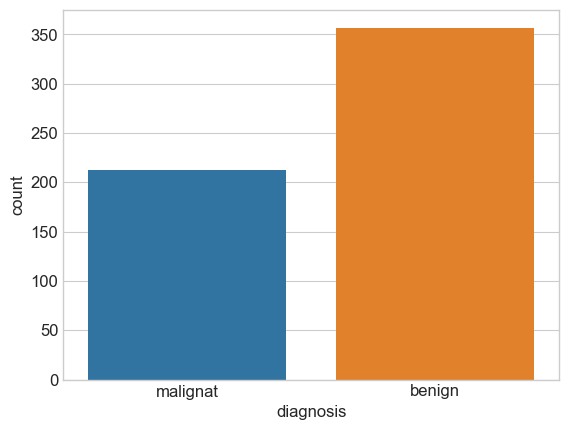

In [220]:
# Display proportion of target variable categories
sns.countplot(df, x='diagnosis')

In [221]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000 

In [222]:
df.groupby('diagnosis').describe()

radius_mean                                                      \
                count       mean       std     min     25%     50%    75%   
diagnosis                                                                   
benign          357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
malignat        212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

                 texture_mean                                              \
             max        count       mean       std    min      25%    50%   
diagnosis                                                                   
benign     17.85        357.0  17.914762  3.995125   9.71  15.1500  17.39   
malignat   28.11        212.0  21.604906  3.779470  10.38  19.3275  21.46   

                         perimeter_mean                                        \
              75%    max          count        mean        std    min     25%   
diagnosis                                                                       
benign     19.760  33.81          357.0   78.075406  11.807438  43.79  70.870   
malignat   23.765  39.28          212.0  115.365377  21.854653  71.90  98.745   

                                  area_mean                                 \
              50%      75%    max     count        mean         std    min   
diagnosis                                                                    
benign      78.18   86.100  114.6     357.0  462.790196  134.287118  143.5   
malignat   114.20  129.925  188.5     212.0  978.376415  367.937978  361.6   

                                         smoothness_mean                      \
             25%    50%      75%     max           count      mean       std   
diagnosis                                                                      
benign     378.2  458.4   551.10   992.1           357.0  0.092478  0.013446   
malignat   705.3  932.0  1203.75  2501.0           212.0  0.102898  0.012608   

                                                       compactness_mean  \
               min      25%      50%       75%     max            count   
diagnosis                                                                 
benign     0.05263  0.08306  0.09076  0.100700  0.1634            357.0   
malignat   0.07371  0.09401  0.10220  0.110925  0.1447            212.0   

                                                                           \
               mean       std      min      25%      50%      75%     max   
diagnosis                                                                   
benign     0.080085  0.033750  0.01938  0.05562  0.07529  0.09755  0.2239   
malignat   0.145188  0.053987  0.04605  0.10960  0.13235  0.17240  0.3454   

          concavity_mean            ... area_worst         smoothness_worst  \
                   count      mean  ...        75%     max            count   
diagnosis                           ...                                       
benign             357.0  0.046058  ...     670.00  1210.0            357.0   
malignat           212.0  0.160775  ...    1712.75  4254.0            212.0   

                                                                             \
               mean       std      min       25%      50%       75%     max   
diagnosis                                                                     
benign     0.124959  0.020013  0.07117  0.110400  0.12540  0.137600  0.2006   
malignat   0.144845  0.021870  0.08822  0.130475  0.14345  0.155975  0.2226   

          compactness_worst                                                  \
                      count      mean       std      min       25%      50%   
diagnosis                                                                     
benign                357.0  0.182673  0.092180  0.02729  0.112000  0.16980   
malignat              212.0  0.374824  0.170372  0.05131  0.244475  0.35635   

                           concavity_worst                               \
               

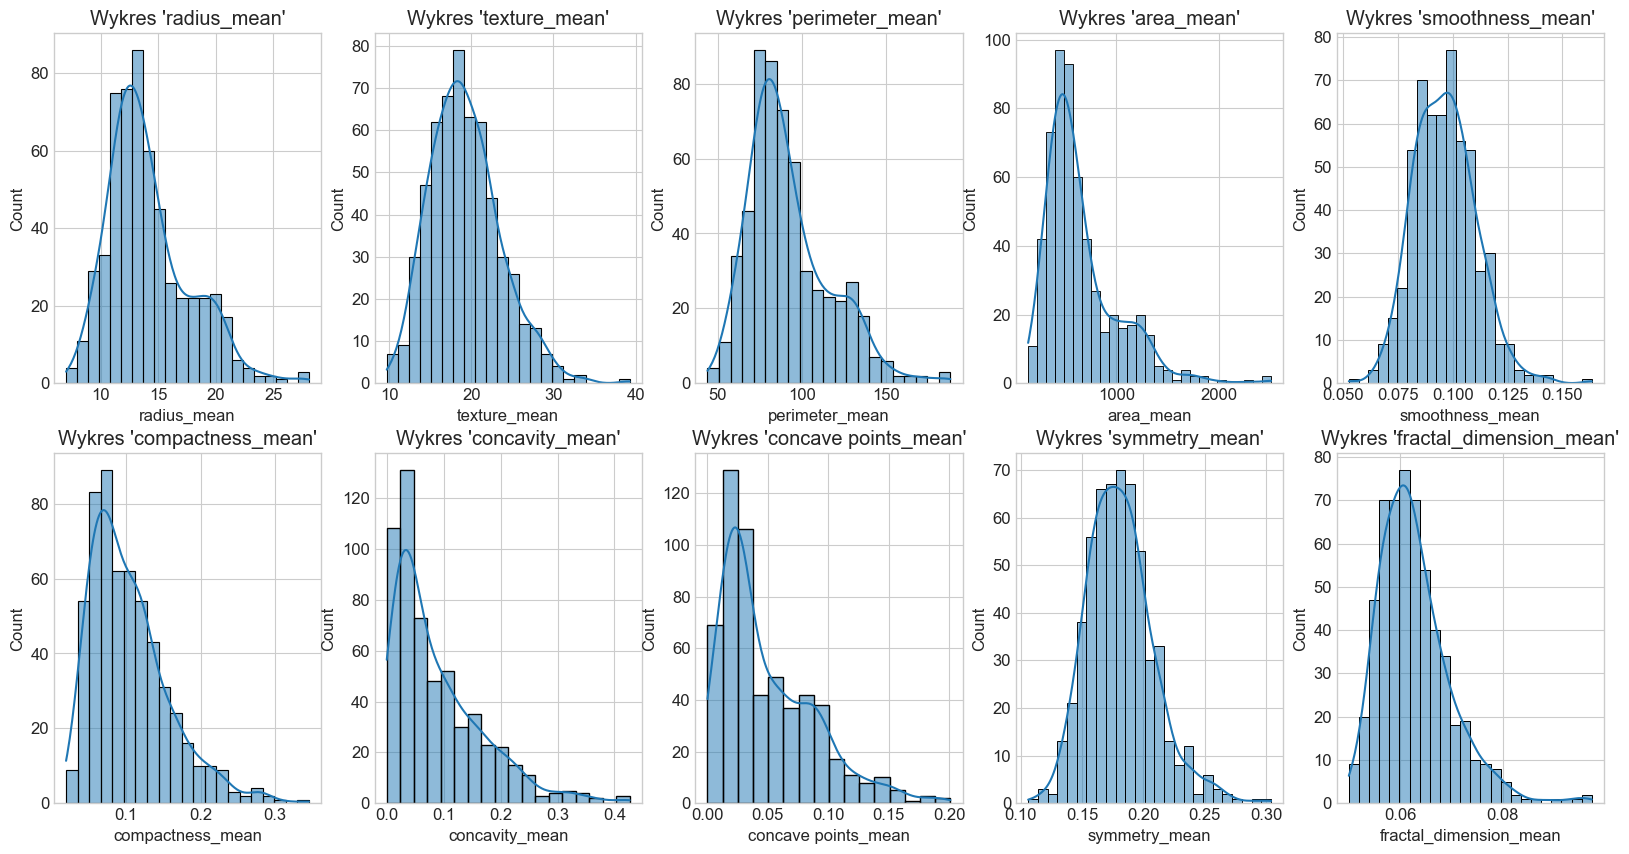

In [223]:
# Plot the distribution of 10 first numerical variables
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=0
for i in range(2):
    for j in range(5):
        # Creating subplot
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

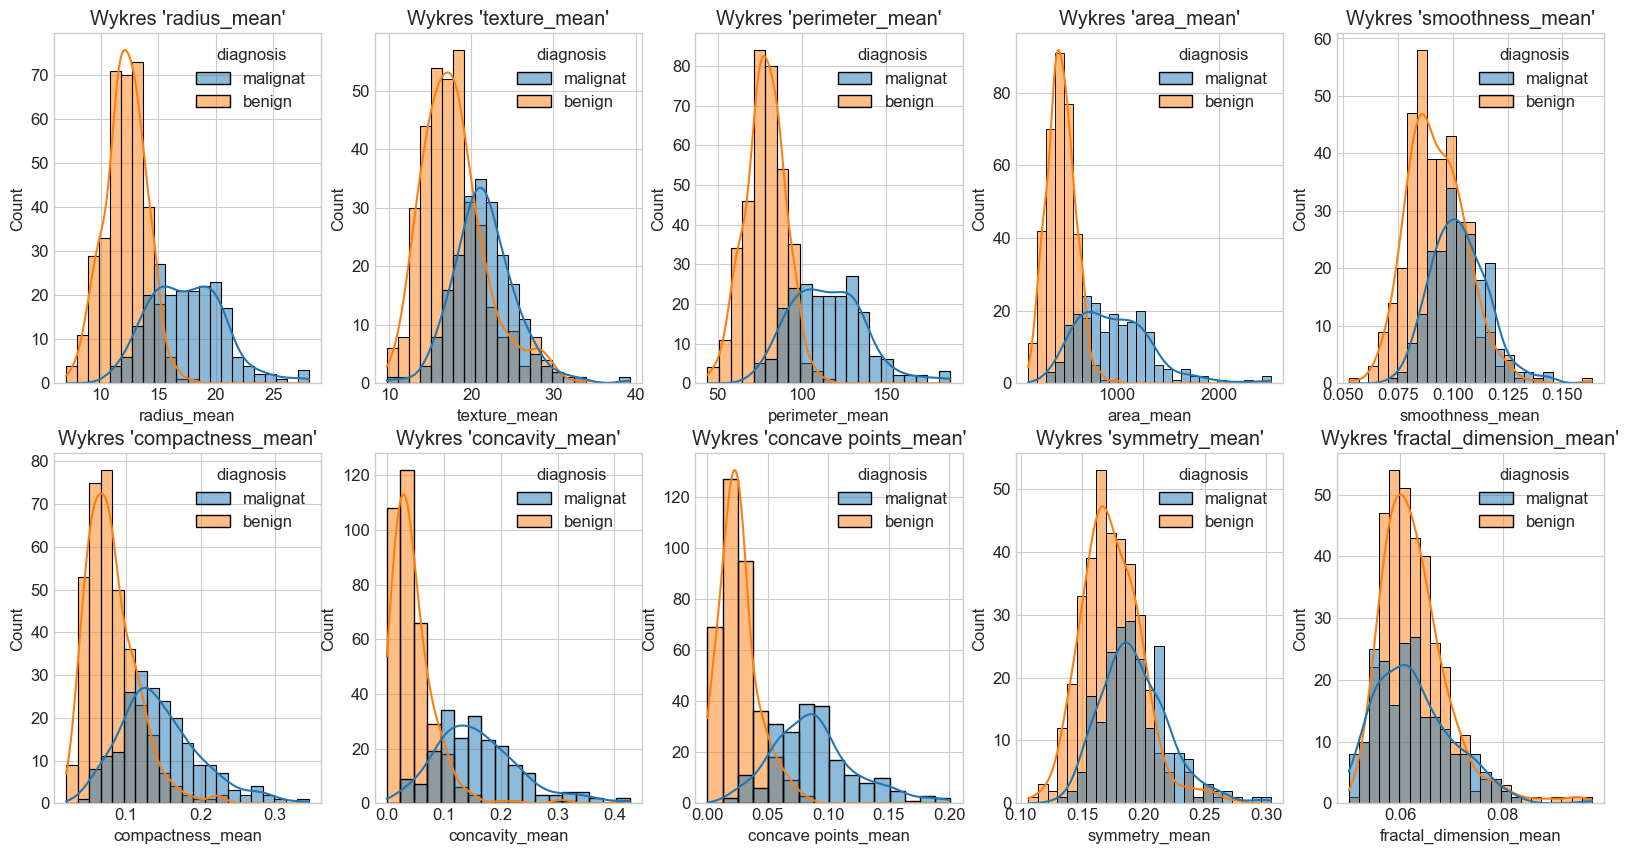

In [224]:
# Plot the distribution of 10 first numerical variables with hue = diagnosis
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=0
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, hue="diagnosis", ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

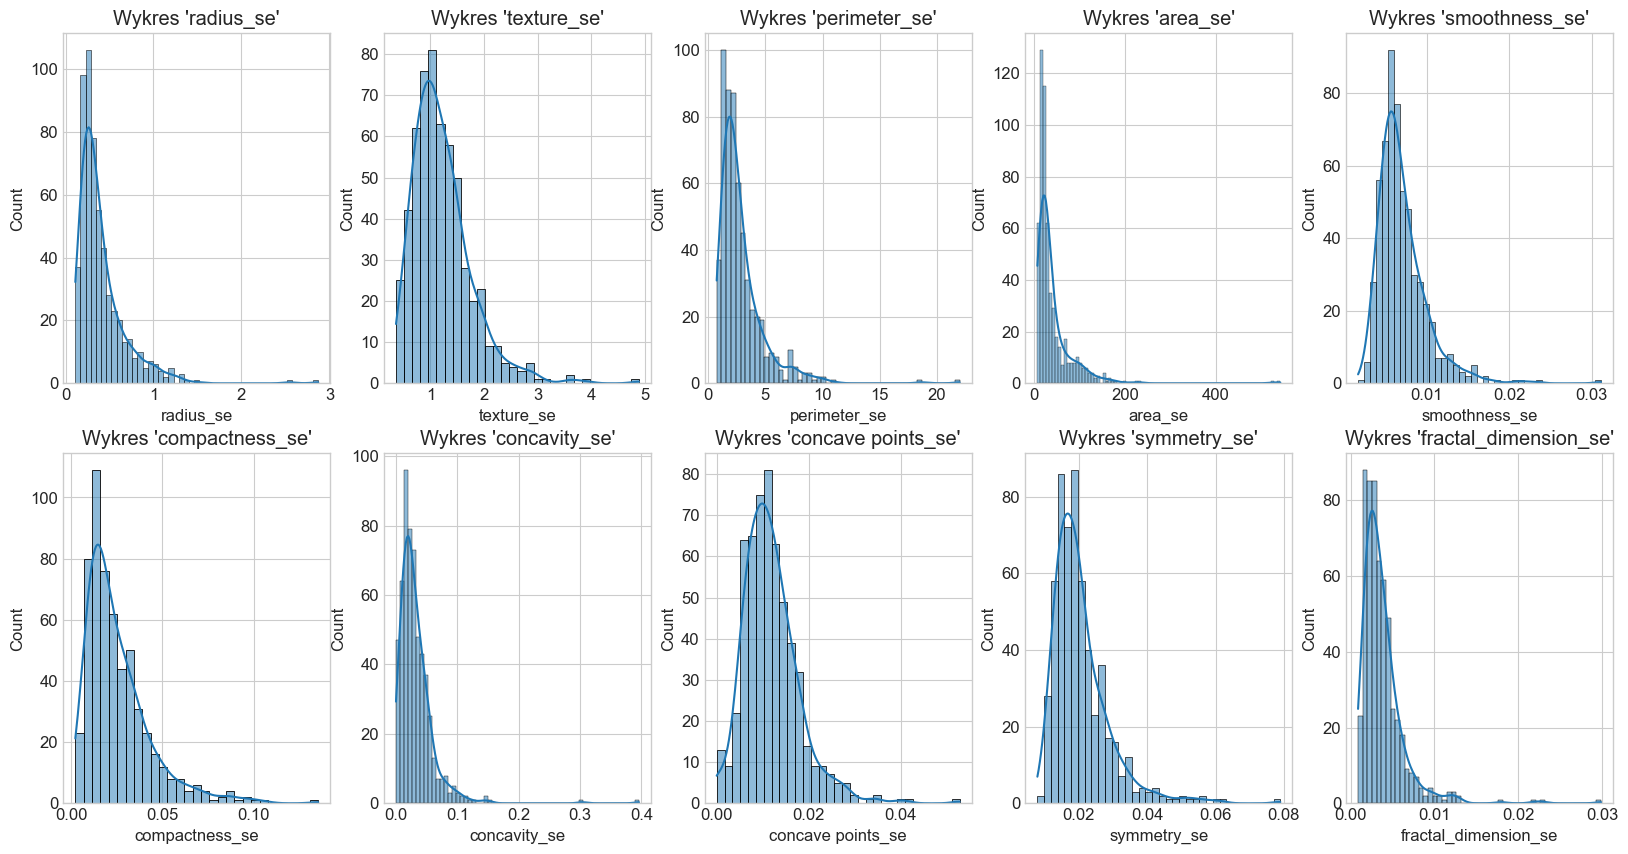

In [225]:
# Plot the distribution of 11:20 numerical variables 
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=10
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

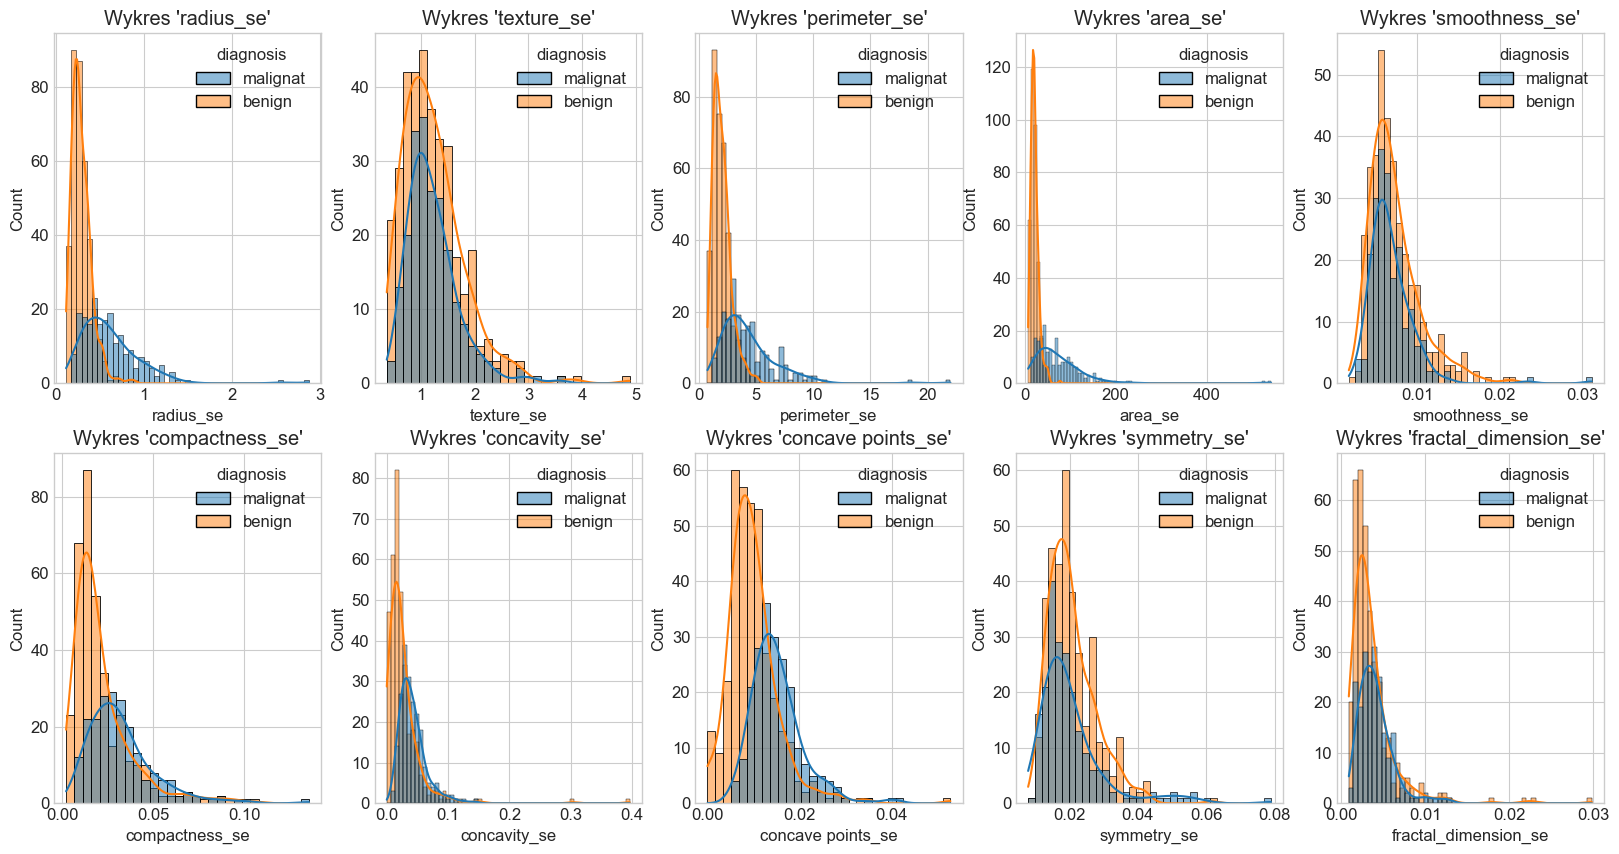

In [226]:
# Plot the distribution of 11:20 numerical variables with hue = diagnosis
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=10
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, hue="diagnosis", ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

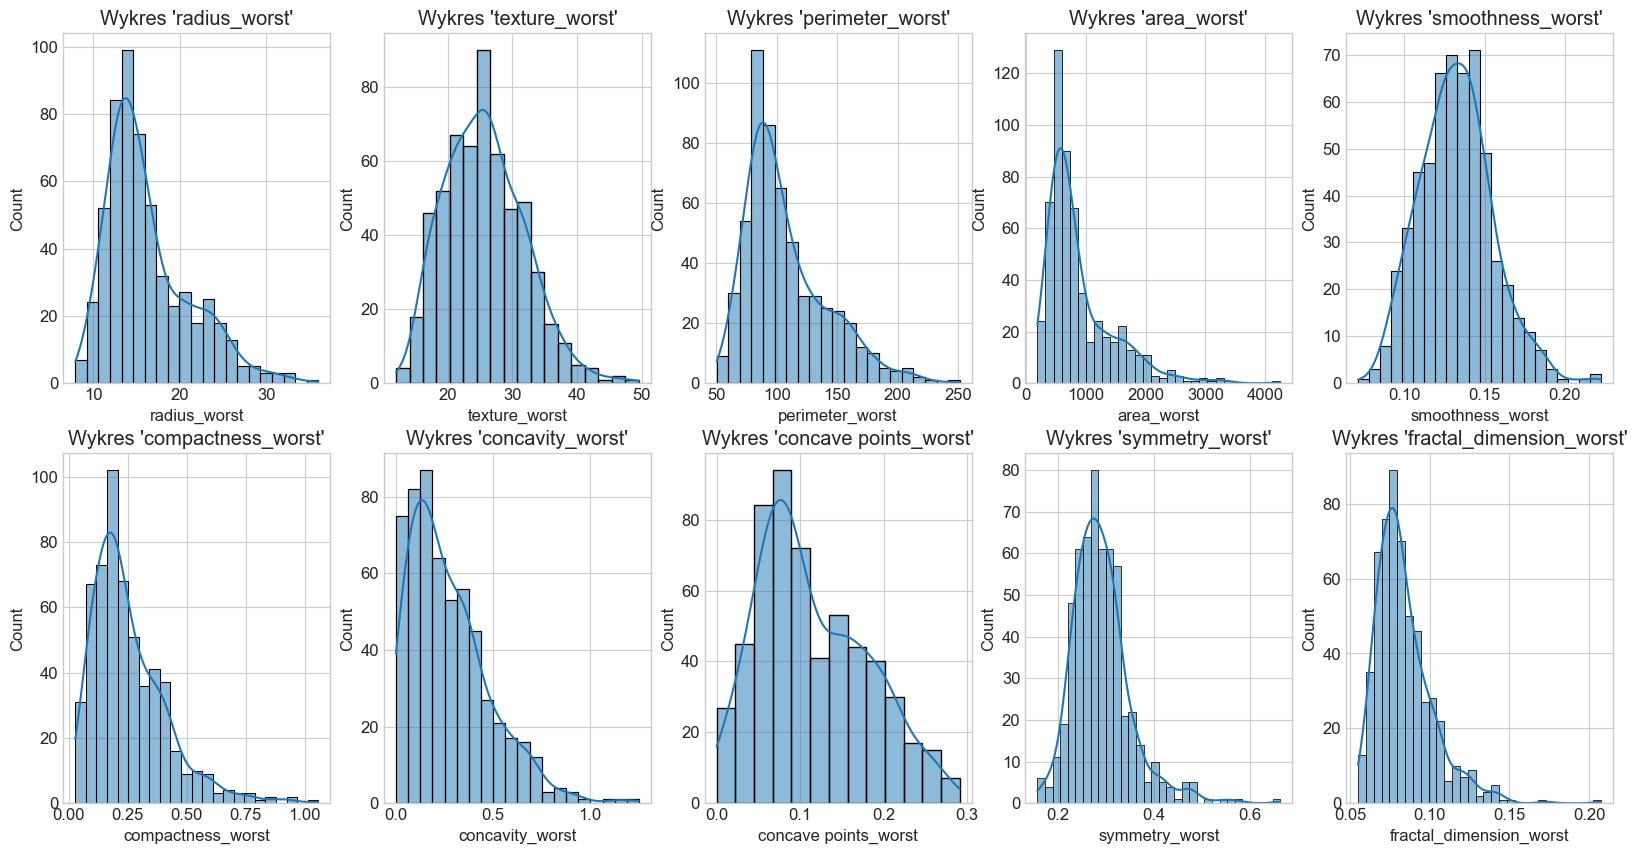

In [227]:
# Plot the distribution of 21:30 numerical variables
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=20
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

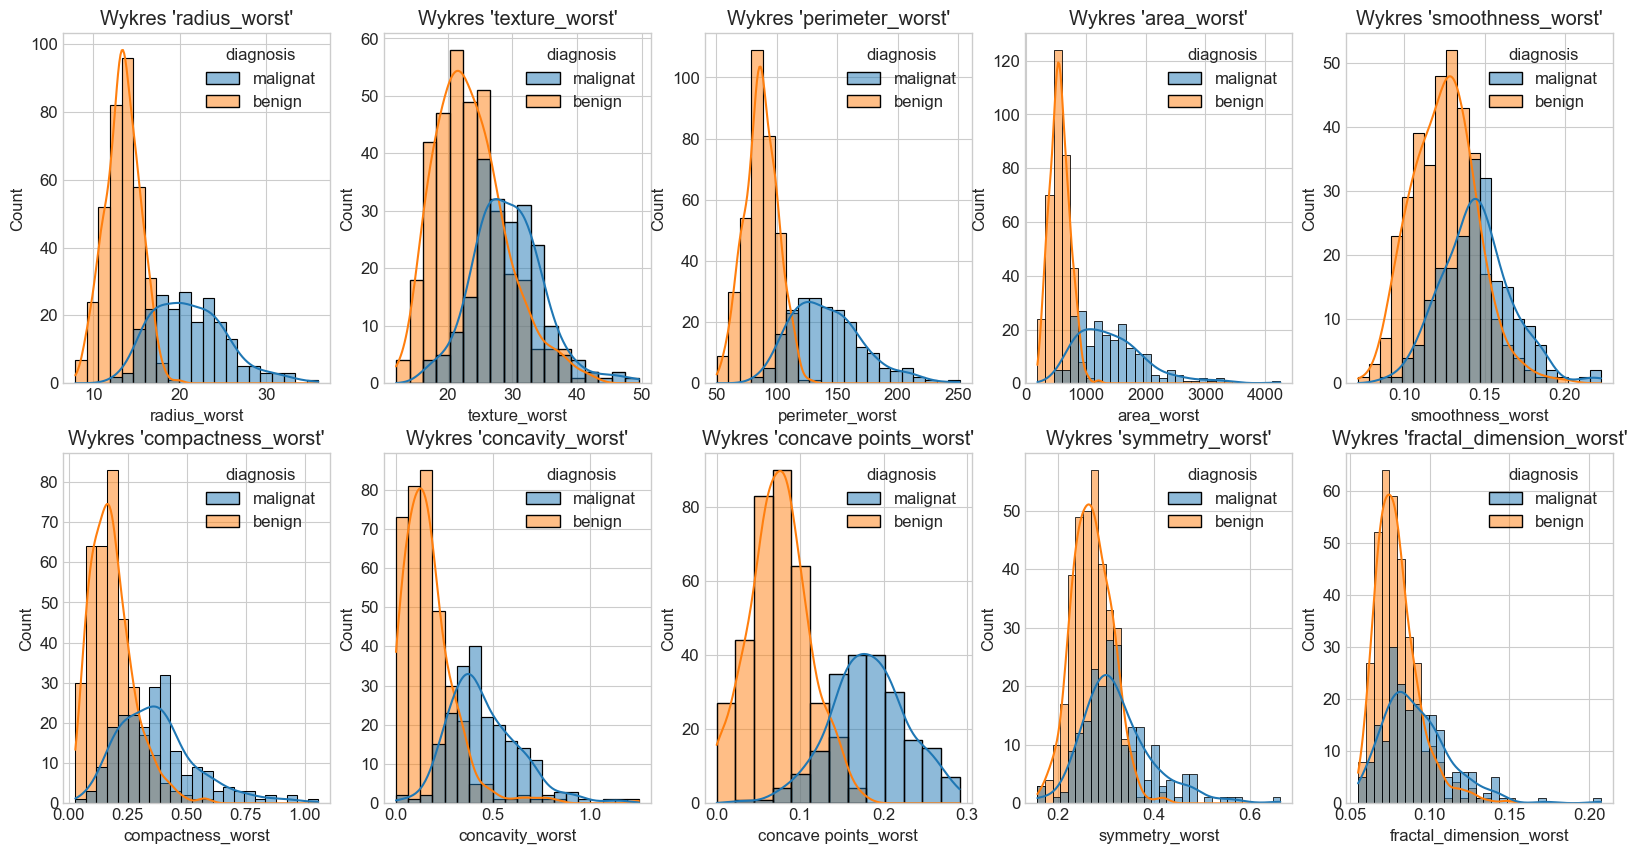

In [228]:
# Plot the distribution of 21:30 numerical variables with hue = diagnosis
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
n=20
for i in range(2):
    for j in range(5):
        sns.histplot(data=df, x=numerical_cols[n],  kde=True, hue="diagnosis", ax=axes[i, j])
        axes[i, j].set_title(f"Wykres '{numerical_cols[n]}'")
        n=n+1

<Axes: >

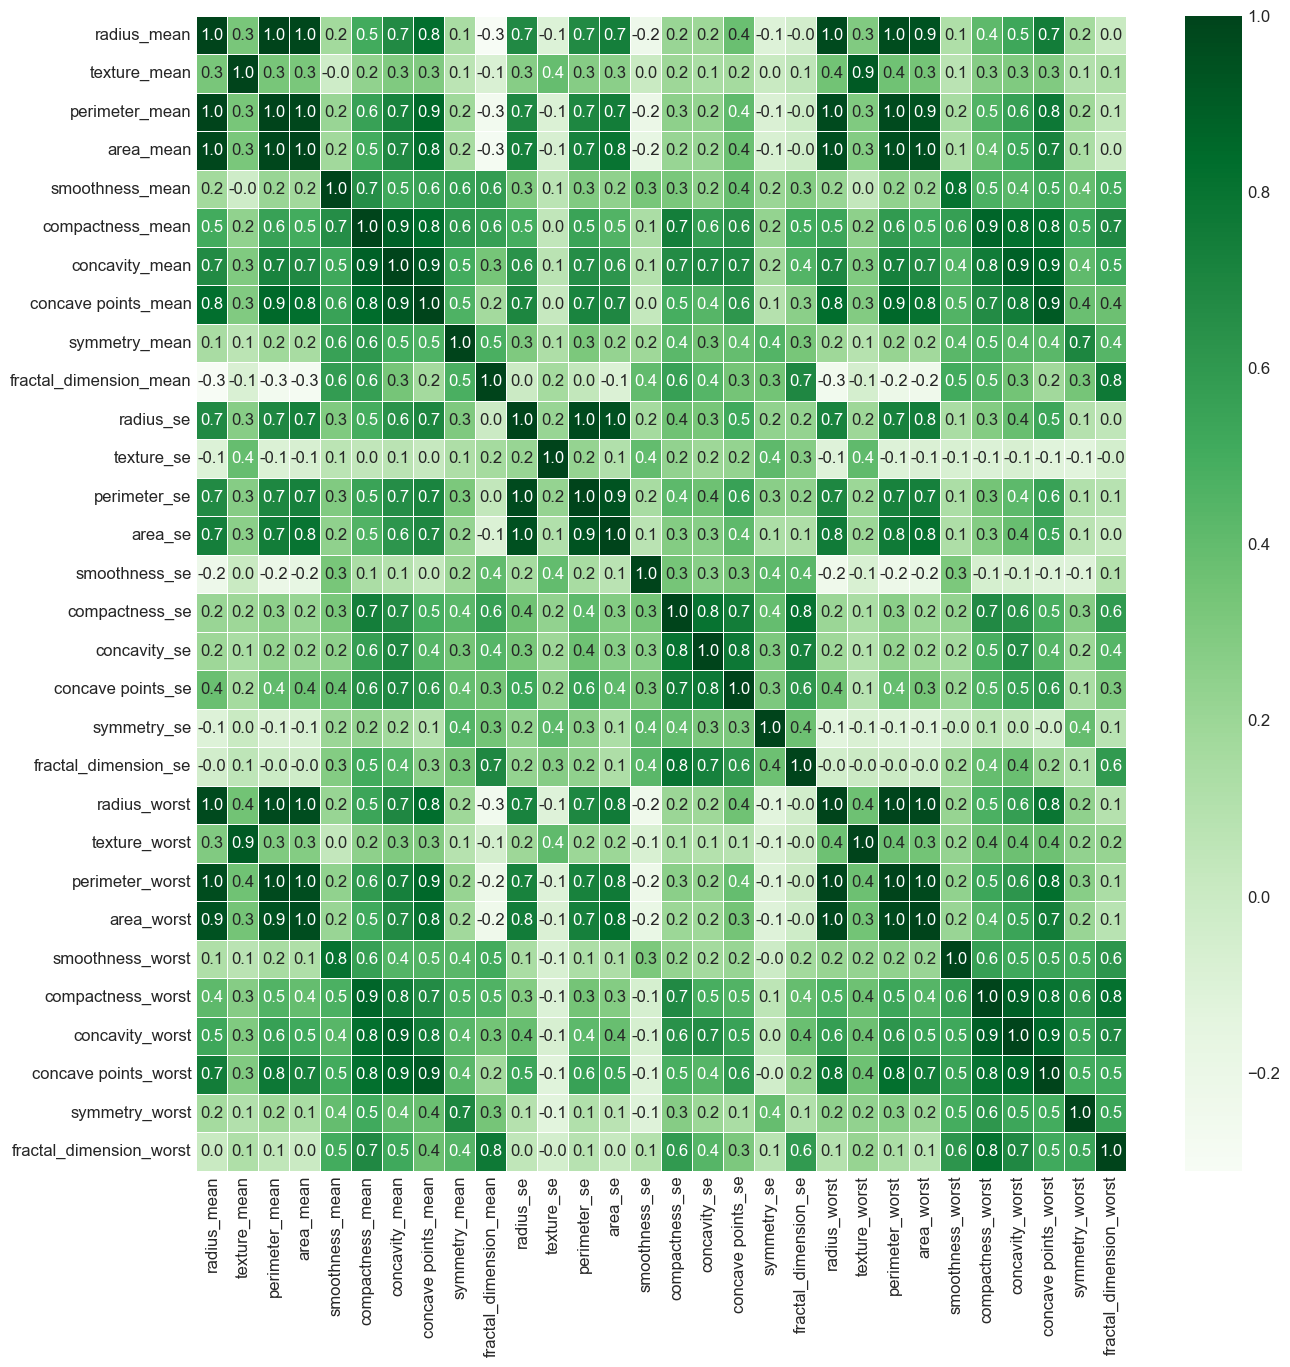

In [229]:
# Check correlation between numerical variables
corr = df[numerical_cols].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".1f", linewidth=.5)

In [230]:
# Standarization for plotting violin, swarn, box plots
df_std = preprocessing.StandardScaler().fit_transform(df[numerical_cols])

In [231]:
df_std = pd.DataFrame(df_std, columns =  df[numerical_cols].columns)
df_std.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  radius_se  texture_se  perimeter_se   area_se  \
0                2.255747   2.489734   -0.565265      2.833031  2.487578   
1               -0.868652   0.499255   -0.876244      0.263327  0.742402   
2               -0.398008   1.228676   -0.780083      0.850928  1.181336   
3                4.910919   0.326373   -0.110409      0.286593 -0.288378   
4               -0.562450   1.270543   -0.790244      1.273189  1.190357   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0      -0.214002        1.316862      0.724026           0.660820   
1      -0.605351       -0.692926     -0.440780           0.260162   
2      -0.297005        0.814974      0.213076           1.424827   
3       0.689702        2.744280      0.819518           1.115007   
4       1.483067       -0.048520      0.828471           1.144205   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0     1.148757              0.907083      1.886690      -1.359293   
1    -0.805450             -0.099444      1.805927      -0.369203   
2     0.237036              0.293559      1.511870      -0.023974   
3     4.732680              2.047511     -0.281464       0.133984   
4    -0.361092              0.499328      1.298575      -1.466770   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0         2.303601    2.001237          1.307686           2.616665   
1         1.535126    1.890489         -0.375612          -0.430444   
2         1.347475    1.456285          0.527407           1.082932   
3        -0.249939   -0.550021          3.394275           3.893397   
4         1.338539    1.220724          0.220556          -0.313395   

   concavity_worst  concave points_worst  symmetry_worst  \
0         2.109526              2.296076        2.750622   
1        -0.146749              1.087084       -0.243890   
2         0.854974              1.955000        1.152255   
3         1.989588              2.175786        6.046041   
4         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  
0                 1.937015  
1                 0.281190  
2                 0.201391  
3                 4.935010  
4                -0.397100

## numerical_cols[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

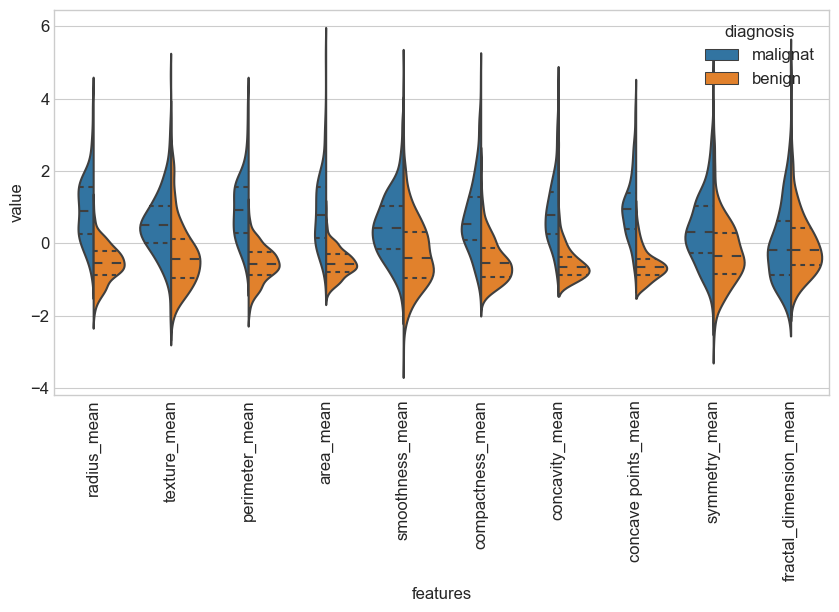

In [232]:
# Prepare data for plotting violin, swarn, box plots
data = pd.concat([df['diagnosis'],df_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(10,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

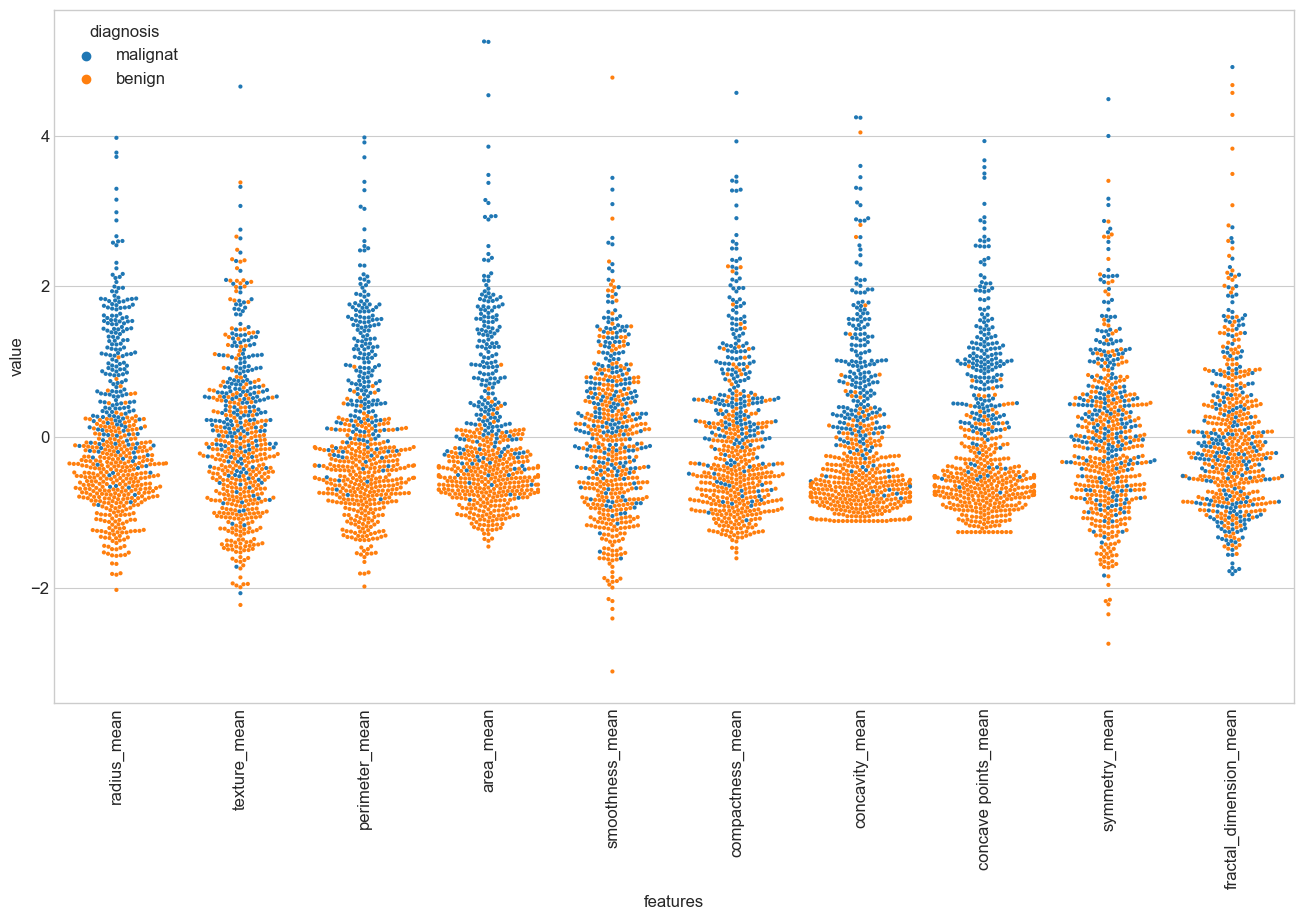

In [233]:
plt.figure(figsize=(16,9))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=3)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

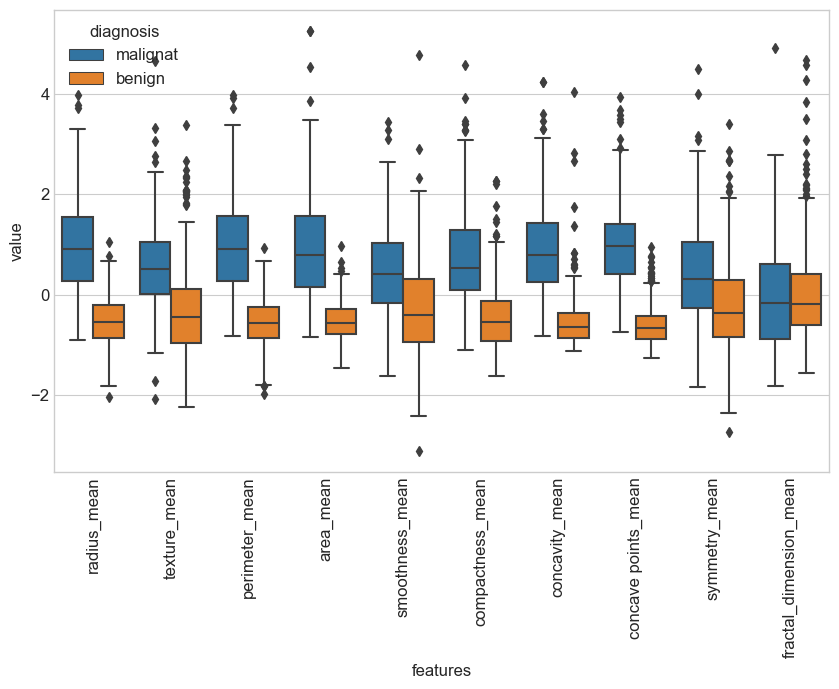

In [234]:
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

<Axes: >

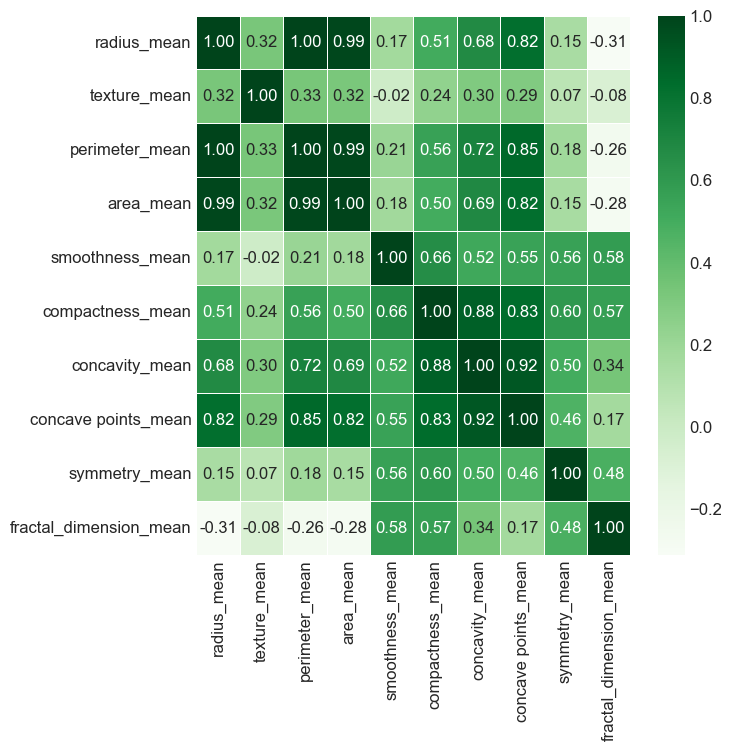

In [235]:
corr = df[numerical_cols[:10]].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# The graphs above show that some features have a different distribution for benign and malignant tumors, and also some features are correlated (e.g., radius_mean and perimeter_mean, area_mean).

# Numerical_cols[10:20]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

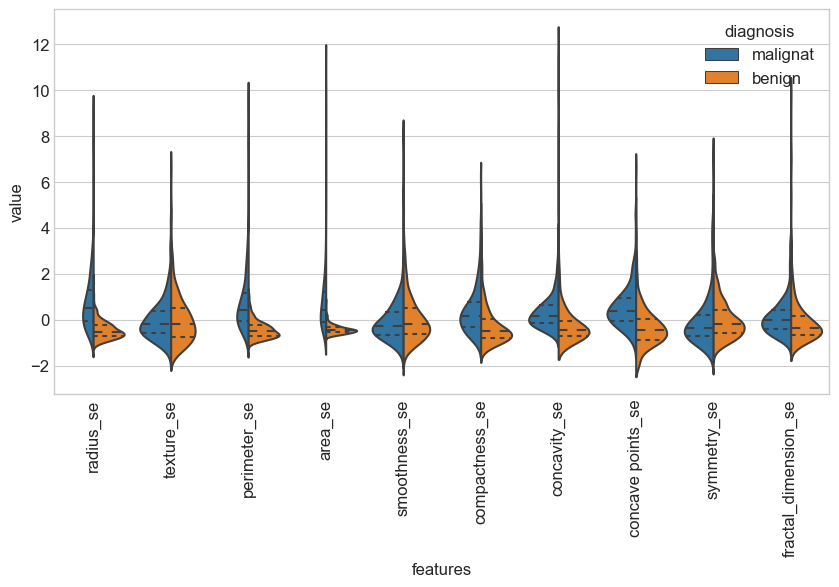

In [236]:
data = pd.concat([df['diagnosis'],df_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(10,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


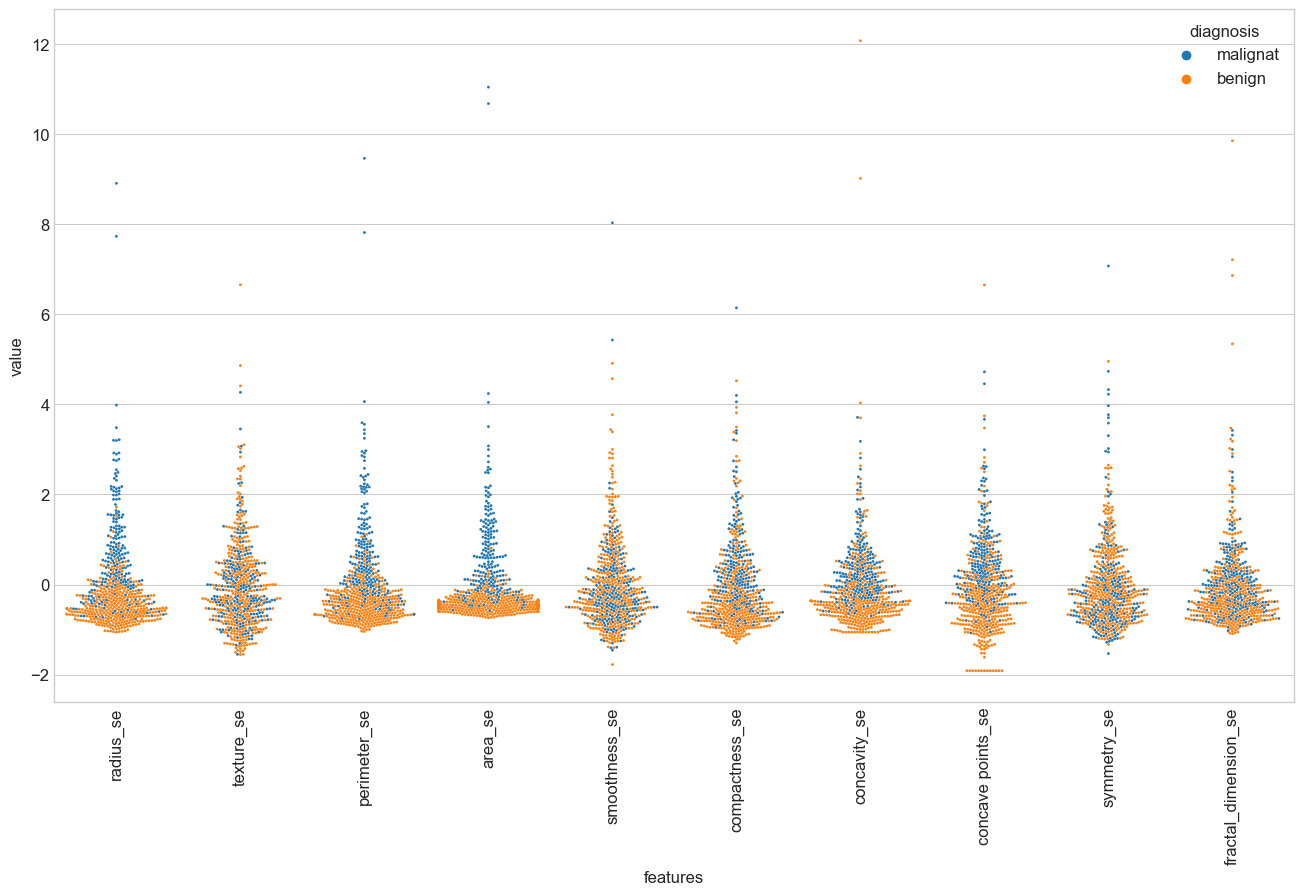

In [237]:
plt.figure(figsize=(16,9))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=2)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

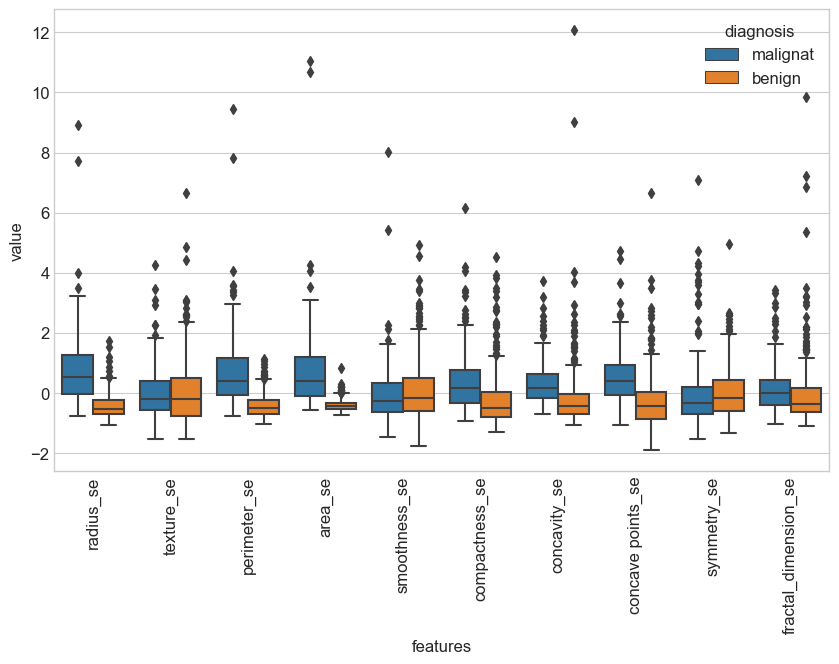

In [238]:
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

<Axes: >

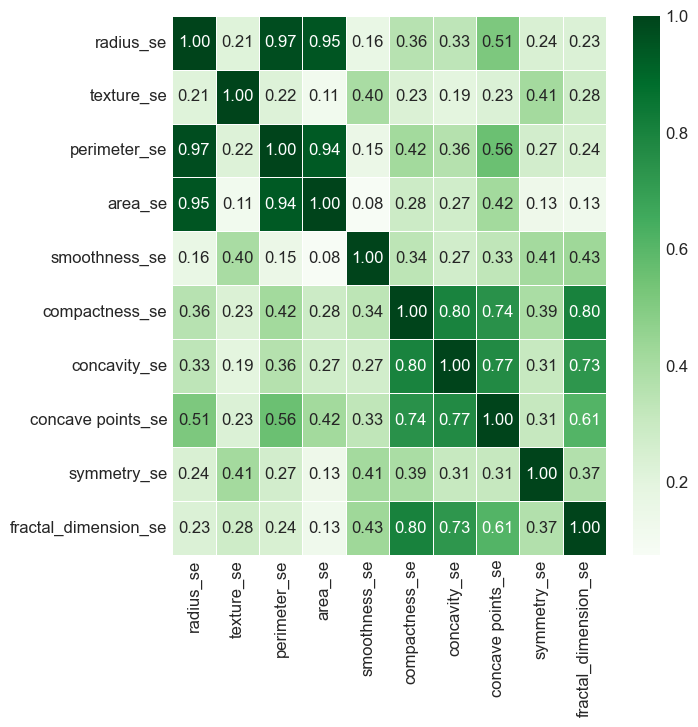

In [239]:
corr = df[numerical_cols[10:20]].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# numerical_cols[20:30]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

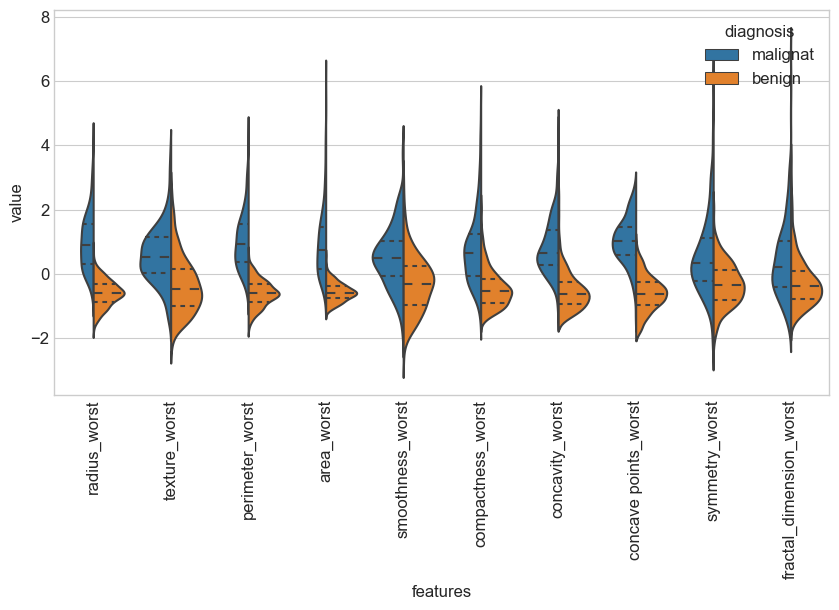

In [240]:
data = pd.concat([df['diagnosis'],df_std.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                     var_name="features",
                     value_name='value')
plt.figure(figsize=(10,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

C:\Users\48504\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


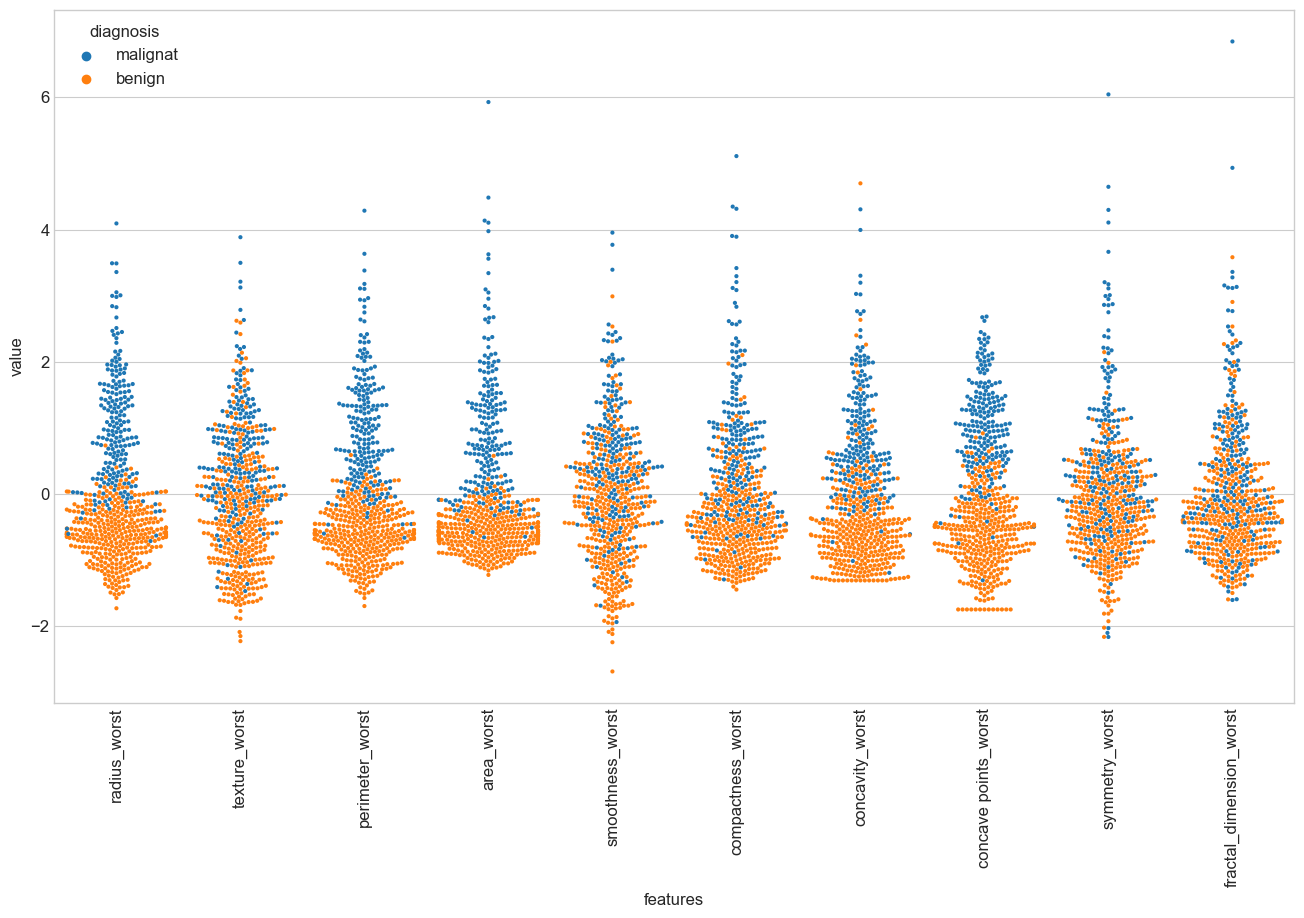

In [241]:
plt.figure(figsize=(16,9))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data, size=3)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

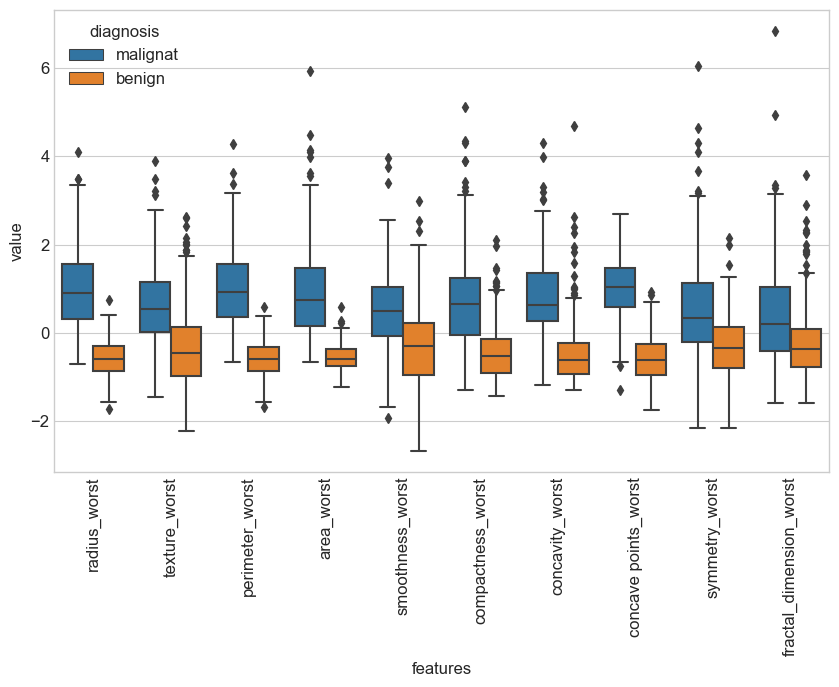

In [242]:
plt.figure(figsize=(10,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

<Axes: >

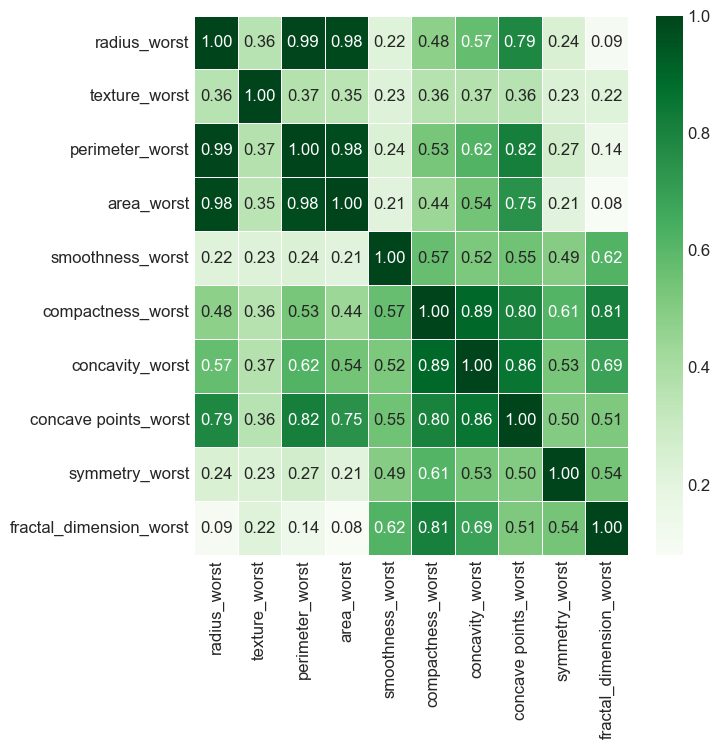

In [243]:
corr = df[numerical_cols[20:30]].corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# Now check correlation for all 10 features between MEAN, SE and WORST

In [244]:
numerical_cols[n:n+1] + numerical_cols[n+10:n+11] + numerical_cols[n+20:n+21] + ['diagnosis']




Index([], dtype='object')

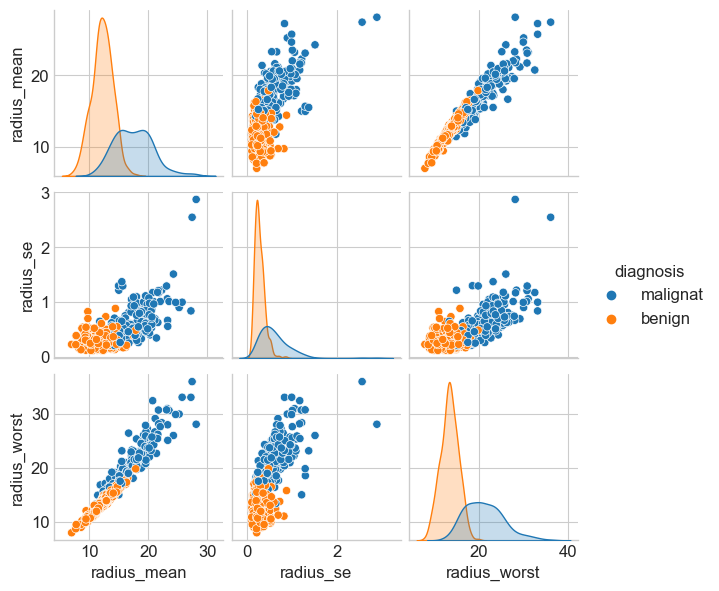

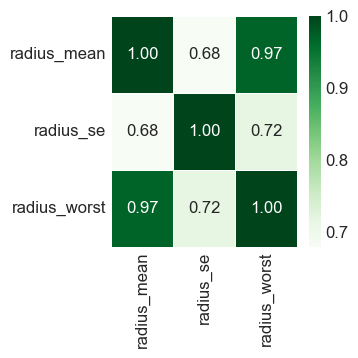

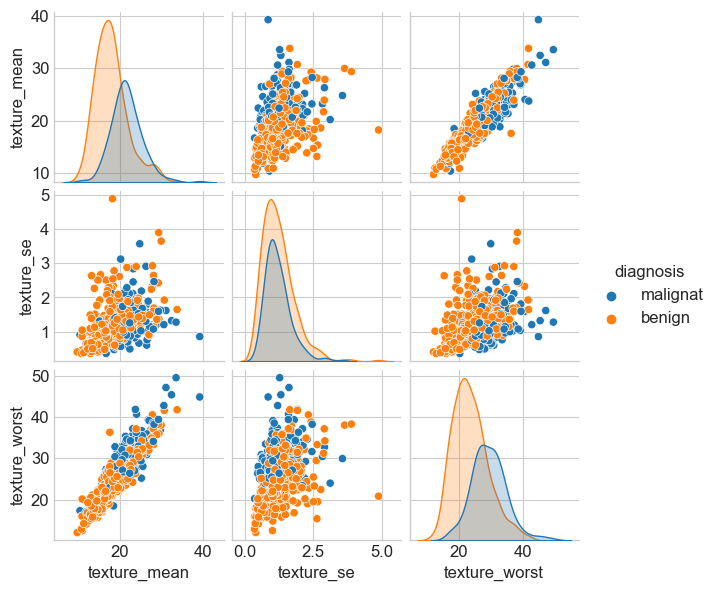

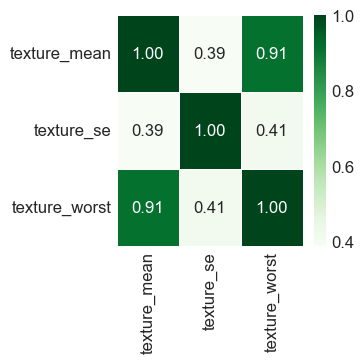

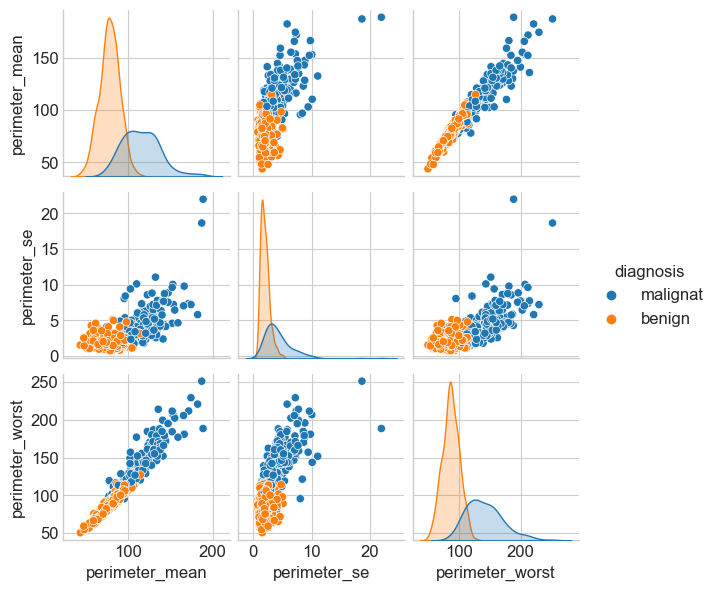

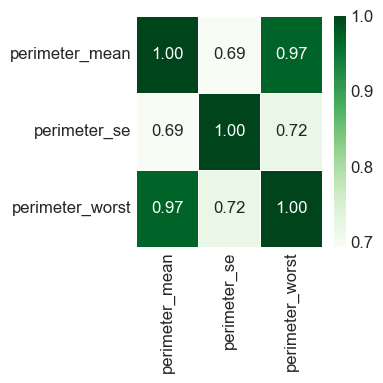

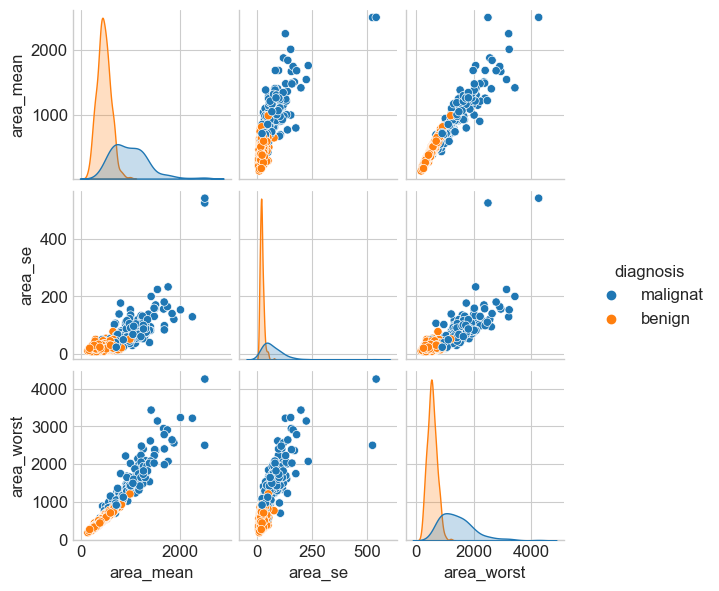

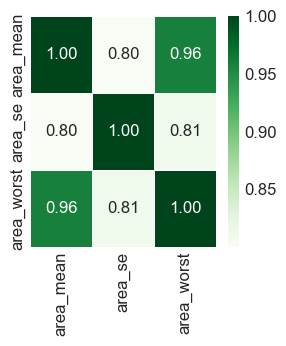

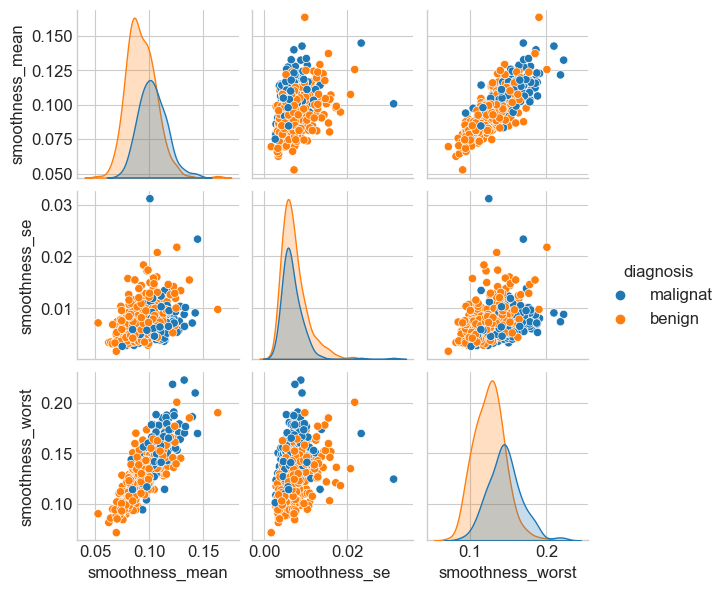

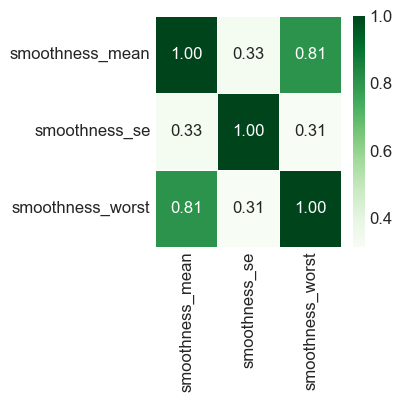

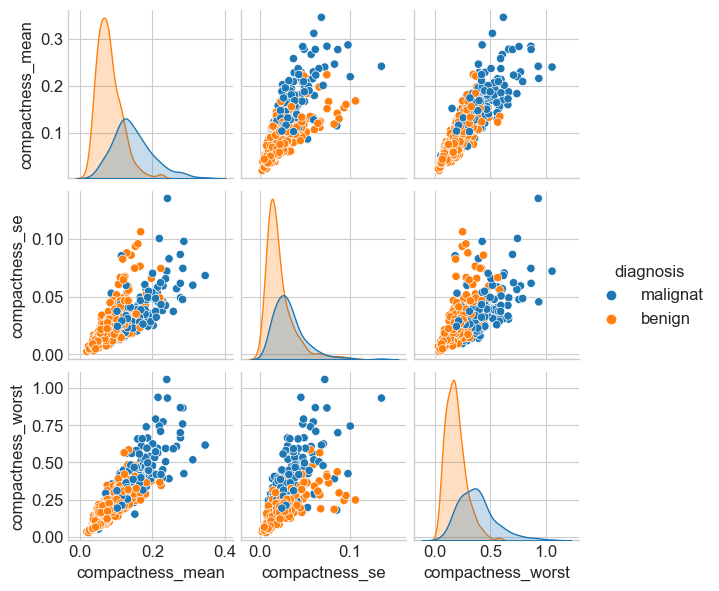

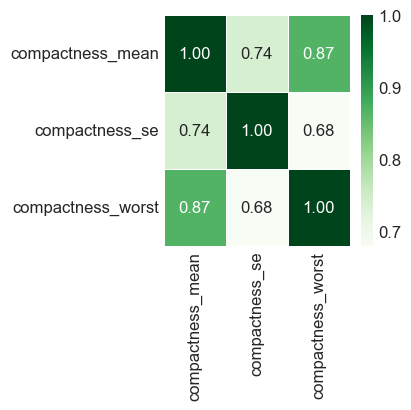

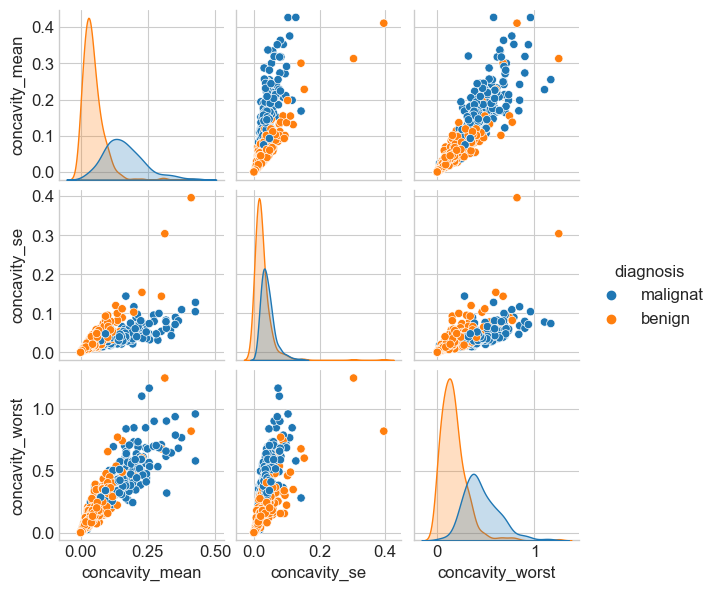

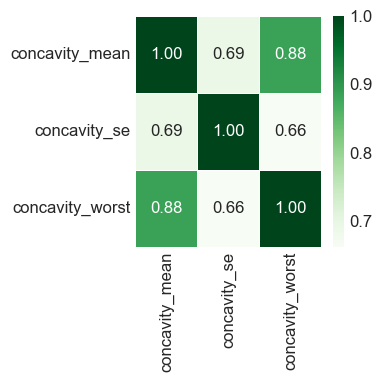

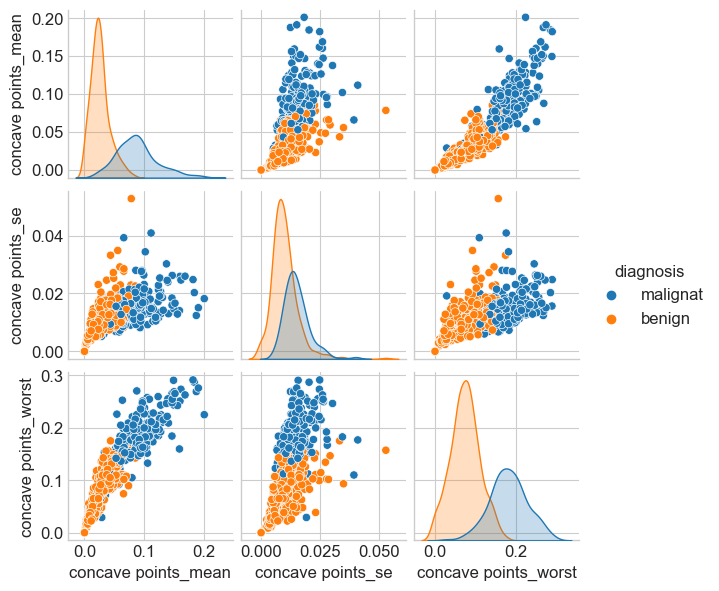

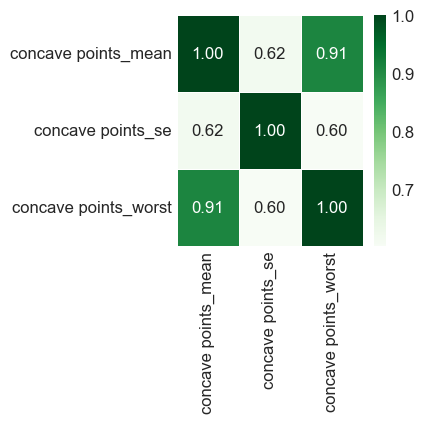

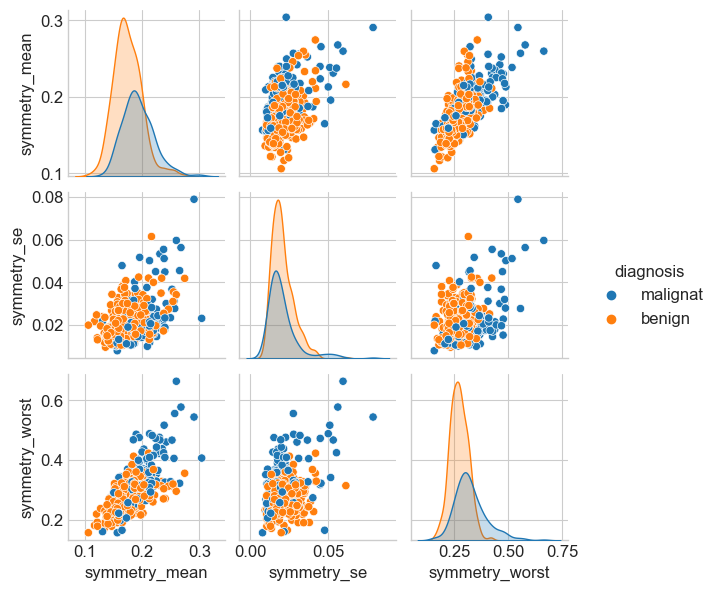

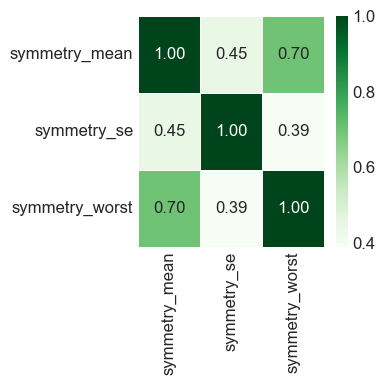

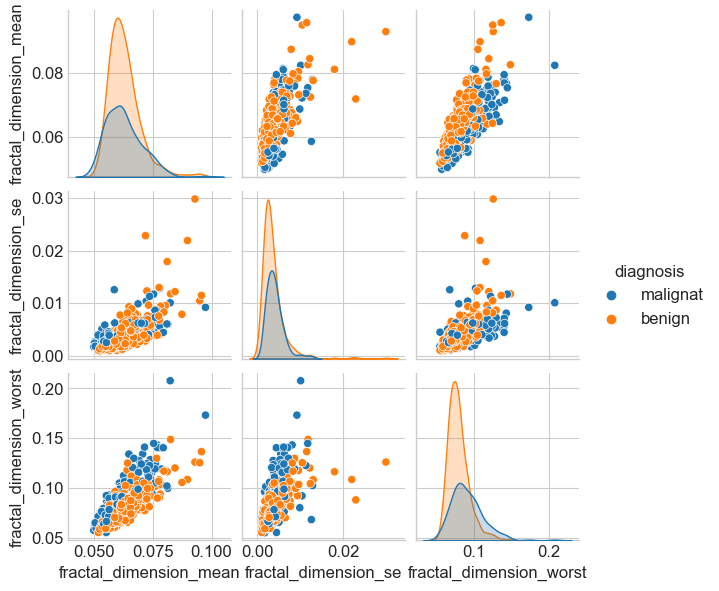

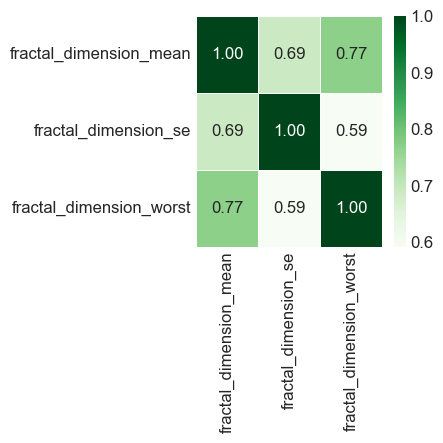

In [245]:

for n in range(0,10):
    col_list_print = []
    col_list_print.extend(numerical_cols[n:n+1])
    col_list_print.extend(numerical_cols[n+10:n+11])
    col_list_print.extend(numerical_cols[n+20:n+21])
    col_list_print.append('diagnosis')
    col_list_print
    sns.pairplot(data=df[col_list_print], diag_kind="kde", hue="diagnosis", height=2)
    plt.show()
    corr = df[col_list_print].corr(numeric_only=True)
    plt.figure(figsize=(3,3))
    sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# Still looking for correlations between variables

<Axes: >

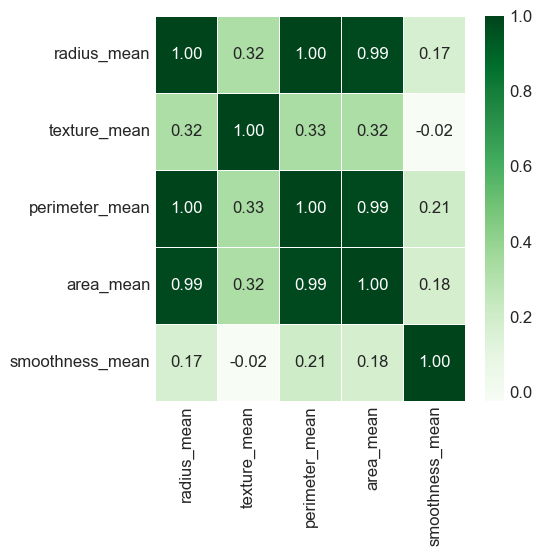

In [246]:
corr = df[numerical_cols[:5]].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

<Axes: >

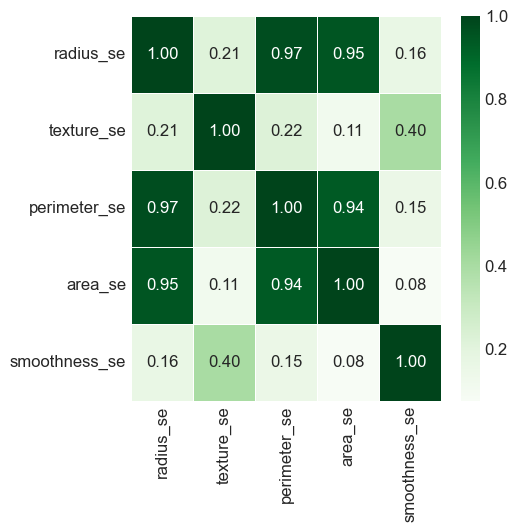

In [247]:
corr = df[numerical_cols[10:15]].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

<Axes: >

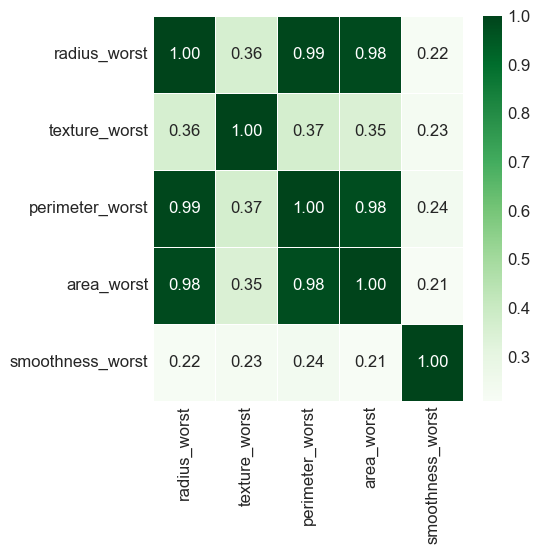

In [248]:
corr = df[numerical_cols[20:25]].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cmap="Greens", annot=True, fmt=".2f", linewidth=.5)

# Create model

In [249]:
# Target variable
y = df['diagnosis']
y.value_counts()

benign      357
malignat    212
Name: diagnosis, dtype: int64

## Encode target labels

In [250]:
lable_enc = LabelEncoder()
y = lable_enc.fit_transform(y)

In [251]:
y[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0])

## Features selections - Own Selection
#### On the basis of analysis of the graphs and correlation matrix, I discarded variables that are linearly dependent among themselves, such as "area_mean" "perimeter_mean" etc. I discarded the columns for which the distribution of the variable did not differ according to the type of cancer on this basis I selected the following columns:

In [252]:
X = df.drop(columns='diagnosis')

In [253]:
X = X[['radius_mean', 'texture_mean', 'smoothness_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']]

In [254]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   smoothness_mean         569 non-null    float64
 3   concave points_mean     569 non-null    float64
 4   symmetry_mean           569 non-null    float64
 5   fractal_dimension_mean  569 non-null    float64
 6   radius_se               569 non-null    float64
 7   texture_se              569 non-null    float64
 8   smoothness_se           569 non-null    float64
 9   concave points_se       569 non-null    float64
 10  symmetry_se             569 non-null    float64
 11  fractal_dimension_se    569 non-null    float64
dtypes: float64(12)
memory usage: 53.5 KB


In [255]:
# Split the data into training and testing sets.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [256]:
X_train.sample(5)

radius_mean  texture_mean  smoothness_mean  concave points_mean  \
494        13.16         20.54          0.07335             0.012560   
25         17.14         16.40          0.11860             0.140100   
144        10.75         14.97          0.07793             0.007875   
7          13.71         20.83          0.11890             0.059850   
561        11.20         29.37          0.07449             0.000000   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
494         0.1713                 0.05888     0.3237       1.473   
25          0.3040                 0.07413     1.0460       0.976   
144         0.1399                 0.05688     0.2525       1.239   
7           0.2196                 0.07451     0.5835       1.377   
561         0.1060                 0.05502     0.3141       3.896   

     smoothness_se  concave points_se  symmetry_se  fractal_dimension_se  
494       0.007802           0.005564      0.02086              0.002701  
25        0.008029           0.023970      0.02308              0.007444  
144       0.006547           0.005612      0.01671              0.002360  
7         0.008805           0.014480      0.01486              0.005412  
561       0.007594           0.000000      0.01989              0.001773

# Preprocessing

In [257]:
# Get list of numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols =  X_train.select_dtypes(include=numerics).columns
numerical_cols

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')

In [258]:
# Get list of categorical variables  
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

### In data is only numerical variables, so we don't need to use ColumnTransformer for categorical variables, but i make this for practice so i will use ColumnTransformer to remmeber in future to use it

In [259]:
# Preprocessor for categorical data
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),         
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])

In [260]:
# Preprocessor for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'mean')), # ('imputer_num', SimpleImputer(strategy = 'median')) / ('imputer_num', SimpleImputer(strategy = 'constant')),
    ('std_scaler', StandardScaler()) #('normalizer', Normalizer()) / ('std_scaler', StandardScaler()) / ('minmax_scaler', MinMaxScaler())
    ])

In [261]:
# Bundle preprocessors for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Logistic Regression

In [262]:

log_reg_model = LogisticRegression(random_state = 0, solver='lbfgs', multi_class="auto")

In [263]:
pipeline_log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', log_reg_model)])

In [264]:
pipeline_log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', LogisticRegression(random_state=0))])

In [265]:
# Get predictions for validation data
preds = pipeline_log_reg.predict(X_valid)

In [266]:
# Confusion matrix
print('Confusion matrix :\n', confusion_matrix(y_valid, preds))

Confusion matrix :
 [[62  5]
 [ 4 43]]


## For all features 
 [[ 65,  2  ]
 
 [  2,   45 ]]

### We see that my choice of features is worse than taking all, so i will use sklearn features selections method :)

In [267]:
# Metrics
accuracy = accuracy_score(y_valid, preds)
recall = recall_score(y_valid, preds, average = 'weighted')
precision = precision_score(y_valid, preds, average = 'weighted')
auc_roc = roc_auc_score(y_valid, pipeline_log_reg.predict_proba(X_valid)[:, 1])
f1 = f1_score(y_valid, preds, average = 'weighted')
print(
' AUC ROC = ', auc_roc,
'\n Accuracy = ', accuracy,
'\n Recall = ', recall,
'\n Precision = ', precision,
'\n F1_score = ', f1)

 AUC ROC =  0.9739599872975547 
 Accuracy =  0.9210526315789473 
 Recall =  0.9210526315789473 
 Precision =  0.9214347421584265 
 F1_score =  0.921171349426197


In [268]:
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.90      0.91      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



#For all features 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

In [269]:
# Define function for plotting confusion matrix
def plot_conf_matrix(estimator, x, y, labels = None, normalize = None):
    font_size = plt.rcParams["font.size"]
    plt.rcParams.update({'font.size':20})
    
    if normalize:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        titles_options = [
                ("Confusion matrix, without normalization", None),
                ("Normalized confusion matrix", "true"),
            ]
        j = 0
        for title, normalize in titles_options:
            disp = ConfusionMatrixDisplay.from_estimator(
                    estimator,
                    x,
                    y,
                    display_labels=labels,
                    cmap=plt.cm.Blues,
                    normalize=normalize,
                    ax=axes[j]
                )
            disp.ax_.set_title(title)
            j = j+1        
    else:
        title = "Confusion matrix"
        disp = ConfusionMatrixDisplay.from_estimator(
                    estimator,
                    x,
                    y,
                    display_labels=labels,
                    cmap=plt.cm.Blues,
                    normalize=normalize
                )
        disp.ax_.set_title(title)
    plt.show()
    plt.rcParams.update({'font.size': font_size})

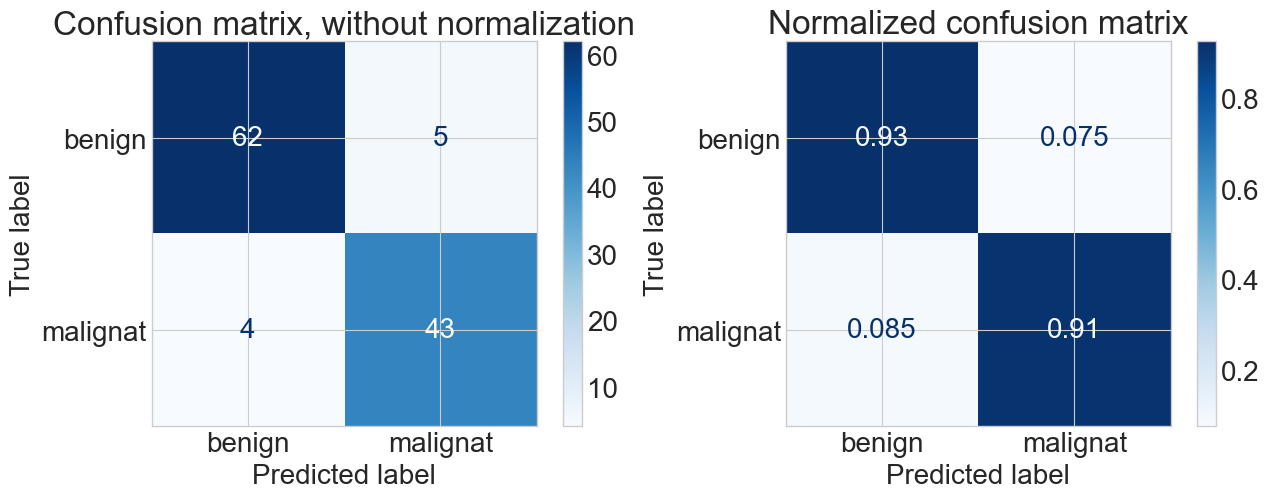

In [270]:
plot_conf_matrix(estimator = pipeline_log_reg, x= X_valid, y= y_valid, labels = lable_enc.classes_, normalize = True)

# Automatic Features selection using SequentionalFeatureSelector

In [292]:
X = df.drop(columns='diagnosis')
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [293]:
# Get list of numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols =  X_train.select_dtypes(include=numerics).columns
numerical_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [294]:
# Get list of categorical variables  
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [295]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# feature_selector = SFS(
#     LogisticRegression(),
#     forward=False,
#     #direction= "backward",  # "backward" / "forward", 
#     scoring='accuracy', #"roc_auc" /"recall"/"precision"/'f1'/'neg_log_loss'
#     cv=5,
#     n_jobs=-1)  

In [296]:
#TOO Long
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# feature_selector = EFS(
#     LogisticRegression(),
#     min_features = 19,
#     max_features = 20,
#     #direction= "backward",  # "backward" / "forward", 
#     scoring="recall",  #"roc_auc" /"recall"/"precision"/'f1'/'neg_log_loss'
#     cv=5,
#     n_jobs=-1,
#     print_progress=True)

In [297]:
feature_selector = SequentialFeatureSelector(
    LogisticRegression(),
    n_features_to_select="auto",
    direction= "backward",  # "backward" / "forward", 
    scoring="recall",  #"roc_auc" /"recall"/"precision"/'f1'/'neg_log_loss'
    cv=5,
    n_jobs=-1)

In [298]:
# Use SequentialFeatureSelector separetly
#feature_selector.fit(X, y)
#feature_selector.get_support()
#feature_selector.get_feature_names_out()

In [299]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [300]:
f_s_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('selector', feature_selector),
                               ('model', log_reg_model)])

f_s_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'tex...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LogisticRegression(),
                                           n_features_to_select='auto',
                                           n_jobs=-1, scoring='recall')),
                ('model', LogisticRegression(random_state=0))])

In [301]:
print(f_s_pipeline[1])

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_features_to_select='auto', n_jobs=-1,
                          scoring='recall')


In [302]:
# https://medium.com/ai-made-simple/pipelines-in-scikit-learn-46c61c5c60b2

In [303]:
f_s_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'tex...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('selector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LogisticRegression(),
                                           n_features_to_select='auto',
                                           n_jobs=-1, scoring='recall')),
                ('model', LogisticRegression(random_state=0))])

In [304]:
# Predict
preds = f_s_pipeline.predict(X_valid)

In [305]:
print('Confusion matrix:\n', confusion_matrix(y_valid, preds))

Confusion matrix:
 [[66  1]
 [ 2 45]]


In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
Confusion matrix:
 [[63  4]
 [ 7 40]]
# scoring="recall"
macierz pomyłek:
 [[66  1]
 [ 2 45]]
# scoring="roc_auc"  
macierz pomyłek:
 [[66  1]
 [ 3 44]]

In [306]:
# Metrics
auc_roc = roc_auc_score(y_valid, f_s_pipeline.predict_proba(X_valid)[:, 1])
accuracy = accuracy_score(y_valid, preds)
recall = recall_score(y_valid, preds, average = 'weighted')
precision = precision_score(y_valid, preds, average = 'weighted')
f1 = f1_score(y_valid, preds, average = 'weighted')
print(' AUC ROC = ', auc_roc,
'\n Accuracy = ', accuracy,
'\n Recall = ', recall,
'\n Precision = ', precision,
'\n F1_score = ', f1)

 AUC ROC =  0.9961892664337885 
 Accuracy =  0.9736842105263158 
 Recall =  0.9736842105263158 
 Precision =  0.9737515143357114 
 F1_score =  0.9736401936741494


In [307]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print(classification_report(y_valid, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



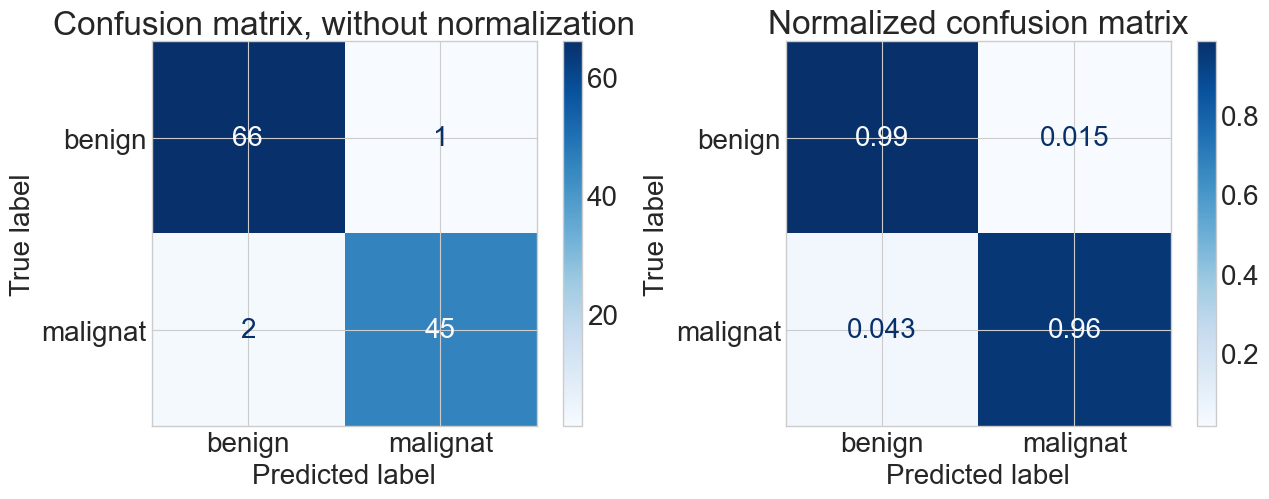

In [308]:
plot_conf_matrix(estimator = f_s_pipeline, x= X_valid, y= y_valid, labels = lable_enc.classes_, normalize = True)

In [309]:
print(f_s_pipeline.named_steps['selector'].get_params())

{'cv': 5, 'direction': 'backward', 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_features_to_select': 'auto', 'n_jobs': -1, 'scoring': 'recall', 'tol': None}


In [311]:
selected_features = X_train.columns[f_s_pipeline.named_steps['selector'].get_support()]
pprint(selected_features)

Index(['concavity_mean', 'radius_se', 'texture_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


In [312]:
print(f'Selected {len(selected_features)} features of {len(X_train.columns)}')

Selected 15 features of 30


# Grid Search on model trained on selected features

In [313]:
X = df.drop(columns='diagnosis')
X = df[selected_features]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   concavity_mean           569 non-null    float64
 1   radius_se                569 non-null    float64
 2   texture_se               569 non-null    float64
 3   concavity_se             569 non-null    float64
 4   concave points_se        569 non-null    float64
 5   fractal_dimension_se     569 non-null    float64
 6   radius_worst             569 non-null    float64
 7   texture_worst            569 non-null    float64
 8   area_worst               569 non-null    float64
 9   smoothness_worst         569 non-null    float64
 10  compactness_worst        569 non-null    float64
 11  concavity_worst          569 non-null    float64
 12  concave points_worst     569 non-null    float64
 13  symmetry_worst           569 non-null    float64
 14  fractal_dimension_worst  5

In [314]:
# Split the data into training and testing sets.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [315]:
# Get list of numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols =  X_train.select_dtypes(include=numerics).columns
numerical_cols

Index(['concavity_mean', 'radius_se', 'texture_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [316]:
# Get list of categorical variables  
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [317]:
# Preprocessor for categorical data
categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value="missing")),         
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])

In [318]:
# Preprocessor for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy = 'mean')), # ('imputer_num', SimpleImputer(strategy = 'median')) / ('imputer_num', SimpleImputer(strategy = 'constant')),
    ('std_scaler', StandardScaler()) #('normalizer', Normalizer()) / ('std_scaler', StandardScaler()) / ('minmax_scaler', MinMaxScaler())
    ])

In [319]:
# Bundle preprocessors for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [320]:

log_reg_model = LogisticRegression(random_state = 0, max_iter=10000)

# Define the parameter grid
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', log_reg_model)])

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1) # scoring='roc_auc' / 'recall' / 'precision' / 'f1' / 'neg_log_loss' max_iter=1000

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters:  {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best Score:  0.9754603605349874


In [321]:
# Make predictions with the best model
y_pred = grid_search.best_estimator_.predict(X_valid)

y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [322]:
y_pred_proba = grid_search.best_estimator_.predict_proba(X_valid).round(2)
y_pred_proba[:5]

array([[0.01, 0.99],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ]])

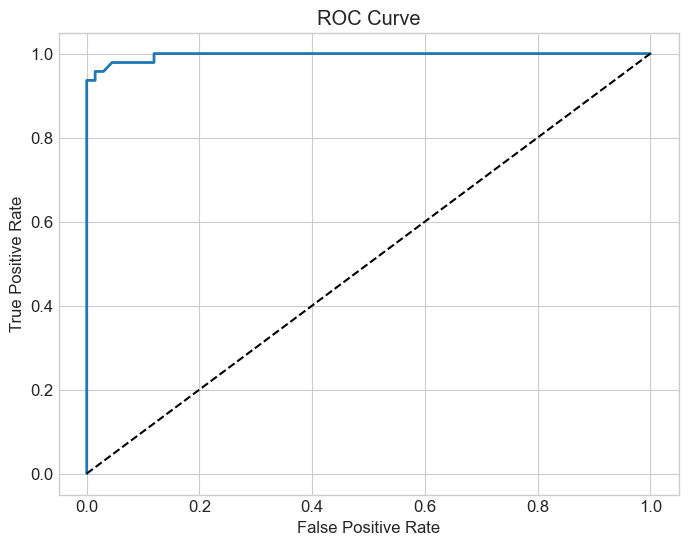

In [323]:
# Plot ROC curve

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

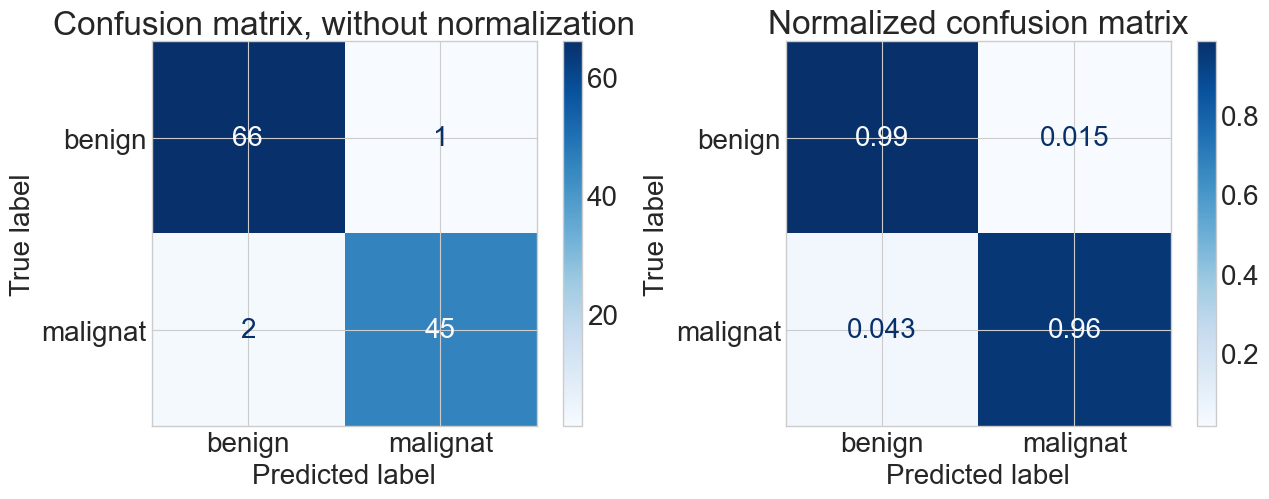

In [324]:
plot_conf_matrix(estimator = grid_search.best_estimator_, x= X_valid, y= y_valid, labels = lable_enc.classes_, normalize = True)

In [325]:
# Metrics
auc_roc = roc_auc_score(y_valid, grid_search.best_estimator_.predict_proba(X_valid)[:, 1])
accuracy = accuracy_score(y_valid, preds)
recall = recall_score(y_valid, preds, average = 'weighted')
precision = precision_score(y_valid, preds, average = 'weighted')
f1 = f1_score(y_valid, preds, average = 'weighted')
print(' AUC ROC = ', auc_roc,
'\n Accuracy = ', accuracy,
'\n Recall = ', recall,
'\n Precision = ', precision,
'\n F1_score = ', f1)

 AUC ROC =  0.9961892664337885 
 Accuracy =  0.9736842105263158 
 Recall =  0.9736842105263158 
 Precision =  0.9737515143357114 
 F1_score =  0.9736401936741494
